In [1]:
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt
import matplotlib.axes as axe
import pandas as pd
import datetime as dt
import gurobipy as gp
from gurobipy import GRB
import cvxpy as cp

import random
from itertools import chain, combinations, tee
import time



# Budget vs Discount - Theory

## 1 Eligible group, 0 Ineligible group (Theory)

In [2]:
def F_01(val, ell, tau, alpha):
    return ell(val) + (1 - alpha) * tau - ell(1 - val)

def y_star_01(ell, tau, alpha, lb_init = 0.0, ub_init = 1.0, num_iters = 20):
    # Searches for y^\star satisfying ell(y^\star) + (1 - \alpha) \tau = ell(1 - y^\star)
    assert tau < ell(ub_init) - ell(lb_init), "We must have tau < ell(1.0) - ell(0.0), else is trivial"
    assert 0.0 <= alpha <= 1.0, "We must have 0.0 <= alpha <= 1.0"
    assert ell(lb_init) + (1.0 - alpha) * tau < ell(ub_init)
    
    lb = lb_init
    ub = ub_init
    mid_val = (lb + ub)/2
    
    for k in range(num_iters):
#         print("F:", F_01(mid_val, ell, tau, alpha))
#         print("lb:", lb)
#         print("ub:", ub)
#         print("mid_val:", mid_val)
#         print()
        
        if F_01(mid_val, ell, tau, alpha) < 0:
            lb = mid_val
        else:
            ub = mid_val
        mid_val = (lb + ub)/2
    
    return (lb + ub)/2

# def fixed_point_eqn():
    


In [26]:
t_1 = time.time()

ell = lambda x: x**4
# ell = lambda x: np.log(1 + np.exp(x))

tau = 0.6
# alpha = 0.0

num_alpha_grid_points = 100 # Should be even
alpha_vals = np.linspace(0, 1.0, num = num_alpha_grid_points + 1)

alpha_1 = y_star_01(ell, tau, alpha = 0.0, lb_init = 0.0, ub_init = 1.0)
# print("alpha_1:", alpha_1)

y_star_vals_discount = np.array([y_star_01(ell, tau, alpha, lb_init = 0.0, ub_init = 1.0) for alpha in alpha_vals])
y_star_vals_budget = np.ones(int((y_star_vals_discount.shape[0] - 1) / 2)) * alpha_1
index_min = min([k for k in list(range(num_alpha_grid_points)) if alpha_vals[k] >= alpha_1])
# print("index_min:", index_min)
# print("alpha_vals[index_min]:", alpha_vals[index_min])
# print("y_star_vals_budget:", y_star_vals_budget)
# print()

for k in range(y_star_vals_budget.shape[0]):
    if k >= index_min:
        y_star_vals_budget[k] = alpha_vals[k]

print()
# print("y_star_vals_budget:", y_star_vals_budget)

y_star_vals_budget = np.concatenate((y_star_vals_budget, \
                                      np.ones(int((y_star_vals_discount.shape[0] - 1) / 2 + 1)) * 0.5))
# print("y_star_vals_budget:", y_star_vals_budget)


t_2 = time.time()
print("Time:", t_2 - t_1)


Time: 0.00416111946105957


In [27]:
print("alpha_1:", alpha_1)

alpha_2_index = max([k for k in range(len(y_star_vals_discount)) if y_star_vals_discount[k] > alpha_vals[k]])
alpha_2 = (y_star_vals_discount[alpha_2_index] + y_star_vals_discount[alpha_2_index+1])/2

print("alpha_2:", alpha_2)

plt.rcParams['text.usetex'] = True
# plt.rcParams['text.usetex'] = False

alpha_1: 0.1198124885559082
alpha_2: 0.15593242645263672


Text(0, 0.5, '$\\displaystyle y^C, y^D$')

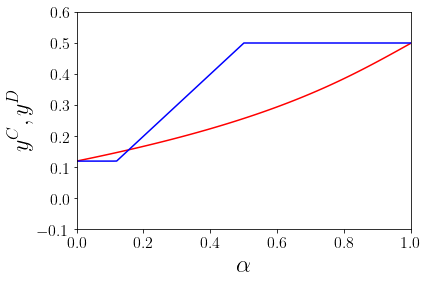

In [5]:
plt.plot(alpha_vals, y_star_vals_discount, 'red')
plt.plot(alpha_vals, y_star_vals_budget, 'blue')
plt.xlim([0, 1])
plt.ylim([-0.1, 0.6])

plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel(r'$\displaystyle \alpha$', fontsize=24)
plt.ylabel(r'$\displaystyle y^C, y^D$', fontsize=24)
# plt.ylabel(r'$\displaystyle \ln(L^t - L^\star)$', fontsize=16)

## 1 Eligible group, 1 Ineligible group (Theory)

In [29]:
def F_11(val, ell, tau, alpha):
    return ell(val) + (1 - alpha) * tau - ell(2 - val)

def y_star_11(ell, tau, alpha, lb_init = 0.0, ub_init = 2.0, num_iters = 20):
    # Searches for y^\star satisfying ell(y^\star) + (1 - \alpha) \tau = ell(2 - y^\star)
    
    assert tau < ell(ub_init) - ell(lb_init), "We must have tau < ell(2.0) - ell(0.0), else is trivial."
    assert 0.0 <= alpha <= 1.0, "We must have 0.0 <= alpha <= 1.0"
    assert ell(lb_init) + (1.0 - alpha) * tau < ell(ub_init)
    
    lb = lb_init
    ub = ub_init
    mid_val = (lb + ub)/2
    
    for k in range(num_iters):
#         print("F:", F_11(mid_val, ell, tau, alpha))
#         print("lb:", lb)
#         print("ub:", ub)
#         print("mid_val:", mid_val)
#         print()
        
        if F_11(mid_val, ell, tau, alpha) < 0:
            lb = mid_val
        else:
            ub = mid_val
        mid_val = (lb + ub)/2
    
    return (lb + ub)/2

# def fixed_point_eqn():
    


In [36]:
t_1 = time.time()

ell = lambda x: x**4 / 16
# ell = lambda x: np.log(1 + np.exp(x))
# alpha = 0.0

# # Case 1: 
# tau = 0.4
# v_E = 1
# v_I = 1.25

# # Case 2: 
# tau = 0.7
# v_E = 1
# v_I = 1.25

# Case 3: 
tau = 0.7
v_E = 1
v_I = 2.5

num_alpha_grid_points = 100 # Should be even
alpha_vals = np.linspace(0, 1.0, num = num_alpha_grid_points + 1)

y_star_zero = y_star_11(ell, tau, alpha = 0.0, lb_init = 0.0, ub_init = 2.0)
# print("y_star_zero:", y_star_zero)

y_star_vals = np.array([y_star_11(ell, tau, alpha, lb_init = 0.0, ub_init = 2.0) for alpha in alpha_vals])
y_star_vals_budget = alpha_vals
index_max = max([k for k in list(range(num_alpha_grid_points)) if alpha_vals[k] <= 1 - v_E/v_I])
# print("index_min:", index_min)
# print("alpha_vals[index_min]:", alpha_vals[index_min])
# print("y_star_vals_budget:", y_star_vals_budget)
# print()

# print("y_star_vals:", y_star_vals)
# print()

y_star_vals_discount = np.copy(y_star_vals)
for k in range(y_star_vals_discount.shape[0]):
    if k <= index_max:
        y_star_vals_discount[k] = 0.0

tau_thresh_for_alpha_3 = 2 * v_E * (ell(1) - ell(1 - 1E-6)) / 1E-6
index_for_alpha_3 = max([k for k in list(range(num_alpha_grid_points)) if y_star_vals[k] >= alpha_vals[k] ])
alpha_3 = (y_star_vals[index_for_alpha_3] + y_star_vals[index_for_alpha_3 + 1])/2

# print("y_star_vals_budget:", y_star_vals_budget)

# print("y_star_vals_budget:", y_star_vals_budget)


t_2 = time.time()
print("Time:", t_2 - t_1)

Time: 0.004014015197753906


In [37]:
print("1 - v^E / v^I:", 1 - v_E/v_I)
print("alpha_3:", alpha_3)

1 - v^E / v^I: 0.6
alpha_3: 0.365936279296875


Text(0, 0.5, '$\\displaystyle y^C, y^D$')

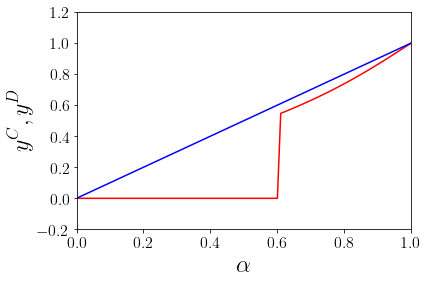

In [38]:
plt.plot(alpha_vals, y_star_vals_discount, 'red')
plt.plot(alpha_vals, y_star_vals_budget, 'blue')
# plt.scatter(alpha_vals, y_star_vals_discount, marker = 'o', s = 0.5, color = 'purple')
# plt.scatter(alpha_vals, y_star_vals_budget, marker = 'o', s = 0.5, color = 'black')
plt.xlim([0, 1.0])
plt.ylim([-0.2, 1.2])

plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel(r'$\displaystyle \alpha$', fontsize=24)
plt.ylabel(r'$\displaystyle y^C, y^D$', fontsize=24)
# plt.ylabel(r'$\displaystyle \ln(L^t - L^\star)$', fontsize=16)

# Toy example 1 - 1 Eligible group, 1 Ineligible group

In [51]:
def _extract_solution_discount_b1(m):
    """
    Get solution from optimization model
    """
    users_in = [v.x for v in m.getVars() if v.VarName.find("ineligible_val") != -1]
    users_el = [v.x for v in m.getVars() if v.VarName.find("eligible_allocation") != -1]
    edge_flows = [v.x for v in m.getVars() if v.VarName.find("edge_flows") != -1]
    
    users_in = np.reshape(users_in, (3, T))
    users_el = np.reshape(users_el, (3, T))
    edge_flows = np.reshape(edge_flows, (2, T))

    solution = {
        "users_in": users_in,
        "users_el": users_el,
        "edge_flows": edge_flows
    }
    
    return solution

In [52]:
def _extract_solution_discount_d1(m):
    """
    Get solution from optimization model
    """
    users_in = [v.x for v in m.getVars() if v.VarName.find("ineligible_val") != -1]
    users_el = [v.x for v in m.getVars() if v.VarName.find("eligible_allocation") != -1]
    edge_flows = [v.x for v in m.getVars() if v.VarName.find("edge_flows") != -1]
    
    users_in = np.reshape(users_in, (2, T))
    users_el = np.reshape(users_el, (2, T))
    edge_flows = np.reshape(edge_flows, (2, T))

    solution = {
        "users_in": users_in,
        "users_el": users_el,
        "edge_flows": edge_flows
    }
    
    return solution

In [53]:
def avg_travel_times_1(solution_set, theta):
    
    users_in = solution_set["users_in"]
    users_el = solution_set["users_el"]
    edge_flows = solution_set["edge_flows"]
    
    avg_travel_time_in = sum( users_in[j, t] * (theta[j,0] + edge_flows[j, t] * theta[j,1]) for j in range(2) for t in range(T)) / T
    avg_travel_time_el = sum( users_el[j, t] * (theta[j,0] + edge_flows[j, t] * theta[j,1]) for j in range(2) for t in range(T)) / T
    avg_travel_time_all = sum( edge_flows[j, t] * (theta[j,0] + edge_flows[j, t] * theta[j,1]) for j in range(2) for t in range(T)) / (T*2)
    
    avg_travel_times = {
        "users_in": avg_travel_time_in,
        "users_el": avg_travel_time_el,
        "users_all": avg_travel_time_all
    }
    
    return avg_travel_times

# def percentage_users()


In [54]:
def m_d1_solve(theta, T, toll, vot_ineligible, vot_eligible, discount_ratio):
    a_1 = theta[0, 0]
    b_1 = theta[0, 1]
    a_2 = theta[1, 0]
    b_2 = theta[1, 1]
    
    # Initialize model
    m_d1 = gp.Model()

    users_in = m_d1.addVars(2, T, name = 'ineligible_val', lb = -10000.0, ub = 10000.0)
    users_el = m_d1.addVars(2, T, name = 'eligible_allocation', lb = -10000.0, ub = 10000.0)
    edge_flows = m_d1.addVars(2, T, name = 'edge_flows', lb = -10000.0, ub = 10000.0)

    ## Add constraints to Model 

    # Total edge flow, express and general purpose lanes:
    m_d1.addConstrs((edge_flows[j, t] == users_in[j, t] + users_el[j, t] for j in range(2) for t in range(T)))

    # Non-negativity of flows, and zero flow for "eligible users in ineligible groups":
    m_d1.addConstrs((users_in[j, t]>=0 for j in range(2) for t in range(T)))
    m_d1.addConstrs((users_el[j, t]>=0 for j in range(2) for t in range(T)))

    # Every eligible and ineligible user is assigned to one of three options: \
    # (express paying, express with credit, non-express)
    m_d1.addConstrs((sum(users_in[j, t] for j in range(2)) == 1 for t in range(T)))
    m_d1.addConstrs((sum(users_el[j, t] for j in range(2)) == 1 for t in range(T)))

    ## To edit below:
    # Set Objective
    m_d1.setObjective(sum( a_1*edge_flows[0, t] + b_1*(edge_flows[0, t]**2)/2  
                        + a_2*edge_flows[1, t] + b_2*(edge_flows[1, t]**2)/2 
                        + toll*users_in[0,t]/vot_ineligible
                        + (1 - discount_ratio)*toll*users_el[0,t]/vot_eligible 
        for t in range(T)), GRB.MINIMIZE)
    
    m_d1.update()

    m_d1.optimize()
    
    solution_set_d1 = _extract_solution_discount_d1(m_d1)

    return solution_set_d1

In [59]:
def m_b1_solve(theta, T, toll, vot_ineligible, vot_eligible, budget):
    a_1 = theta[0, 0]
    b_1 = theta[0, 1]
    a_2 = theta[1, 0]
    b_2 = theta[1, 1]
    
    # Initialize model
    m_b1 = gp.Model()

    users_in = m_b1.addVars(3, T, name = 'ineligible_val', lb = -10000.0, ub = 10000.0)
    users_el = m_b1.addVars(3, T, name = 'eligible_allocation', lb = -10000.0, ub = 10000.0)
    edge_flows = m_b1.addVars(2, T, name = 'edge_flows', lb = -10000.0, ub = 10000.0)

    ## Add constraints to Model 

    # Total edge flow, express and general purpose lanes:
    m_b1.addConstrs((edge_flows[0, t] == users_in[0, t] + users_el[0, t] + users_in[1, t] + users_el[1, t] for t in range(T)))
    m_b1.addConstrs((edge_flows[1, t] == users_in[2, t] + users_el[2, t] for t in range(T)))

    # Non-negativity of flows, and zero flow for "eligible users in ineligible groups":
    m_b1.addConstrs((users_in[j, t] >= 0 for j in range(3) for t in range(T)))
    m_b1.addConstrs((users_el[j, t] >= 0 for j in range(3) for t in range(T)))
    m_b1.addConstrs((users_in[0, t] == 0 for t in range(T)))
    
    # Budget constraint satisfaction:
    if toll != 0:
        m_b1.addConstr((sum(toll*users_el[0, t] for t in range(T)) <= budget))
    m_b1.addConstrs((users_in[0, t] == 0 for t in range(T)))

    # Every eligible and ineligible user is assigned to one of three options: \
    # (express paying, express with credit, non-express)
    m_b1.addConstrs((sum(users_in[j, t] for j in range(3)) == 1 for t in range(T)))
    m_b1.addConstrs((sum(users_el[j, t] for j in range(3)) == 1 for t in range(T)))

    ## To edit below:
    # Set Objective
    m_b1.setObjective(sum( a_1 * (edge_flows[0, t]) + b_1 * (edge_flows[0, t]**2)/2  
                        + a_2 * (edge_flows[1, t]) + b_2 * (edge_flows[1, t]**2)/2 
                        + toll * users_in[1,t]/vot_ineligible
                        + toll * users_el[1,t]/vot_eligible
        for t in range(T)), GRB.MINIMIZE)
    
    m_b1.update()

    m_b1.optimize()
    
    solution_set_b1 = _extract_solution_discount_b1(m_b1)

    return solution_set_b1

In [56]:
def m_bpure_1_solve(theta, T, toll, vot_ineligible, vot_eligible, budget):
    a_1 = theta[0, 0]
    b_1 = theta[0, 1]
    a_2 = theta[1, 0]
    b_2 = theta[1, 1]
    
    # Initialize model
    m_bpure_1 = gp.Model()

    users_in = m_bpure_1.addVars(2, T, name = 'ineligible_val', lb = -10000.0, ub = 10000.0)
    users_el = m_bpure_1.addVars(2, T, name = 'eligible_allocation', lb = -10000.0, ub = 10000.0)
    edge_flows = m_bpure_1.addVars(2, T, name = 'edge_flows', lb = -10000.0, ub = 10000.0)

    ## Add constraints to Model 

    # Total edge flow, express and general purpose lanes:
    m_bpure_1.addConstrs((edge_flows[j, t] == users_in[j, t] + users_el[j, t] for j in range(2) for t in range(T)))

    # Non-negativity of flows, and zero flow for "eligible users in ineligible groups":
    m_bpure_1.addConstrs((users_in[j, t]>=0 for j in range(2) for t in range(T)))
    m_bpure_1.addConstrs((users_el[j, t]>=0 for j in range(2) for t in range(T)))
    
    # Budget constraint satisfaction:
    if toll != 0:
        m_bpure_1.addConstr((sum(toll*users_el[0, t] for t in range(T)) <= budget))

    # Every eligible and ineligible user is assigned to one of three options: \
    # (express paying, express with credit, non-express)
    m_bpure_1.addConstrs((sum(users_in[j, t] for j in range(2)) == 1 for t in range(T)))
    m_bpure_1.addConstrs((sum(users_el[j, t] for j in range(2)) == 1 for t in range(T)))

    ## To edit below:
    # Set Objective
    m_bpure_1.setObjective(sum( a_1*(edge_flows[0, t]) + b_1*(edge_flows[0, t]**2)/2  
                        + a_2*(edge_flows[1, t]) + b_2*(edge_flows[1, t]**2)/2 
                        + toll*users_in[0,t]/vot_ineligible
        for t in range(T)), GRB.MINIMIZE)
    
    m_bpure_1.update()

    m_bpure_1.optimize()
    
    solution_set_bpure_1 = _extract_solution_discount(m_bpure_1)

    return solution_set_bpure_1

In [58]:
time_1 = time.time()

# Affine lane functions:
a_1 = 1.0
b_1 = 1.0
a_2 = 1.0
b_2 = 1.0

# a_1 = 0.5
# b_1 = 0.5
# a_2 = 0.5
# b_2 = 0.5

# a_1 = 4.0
# b_1 = 2.0
# a_2 = 5.0
# b_2 = 1.5

theta = np.array([[a_1, b_1], [a_2, b_2]])
T = 5
# toll = 1.0
# budget = 0.25
toll_array = (np.arange(20) + 1)/20
budget_array = (np.arange(20) + 1)*T/20

vot_ineligible = 1
vot_eligible = 1

solution_set_array_d1 = {}
solution_set_array_bpure_1 = {}
solution_set_array_b1 = {}

# Return solution:

for toll_idx, toll in enumerate(toll_array):
    
    solution_set_array_at_toll_d1 = {}
    solution_set_array_at_toll_bpure_1 = {}
    solution_set_array_at_toll_b1 = {}
    
    for budget_idx, budget in enumerate(budget_array):
        
        if budget > toll * T:
            continue
        
        discount_ratio = budget / (toll * T)
        
        print()
        print("Toll:", toll)
        print("Budget:", budget)
        print("Discount Ratio:", discount_ratio)
        print()
        
        solution_set_d1 = m_d1_solve(theta, T, toll, vot_ineligible, vot_eligible, discount_ratio)
        solution_set_bpure_1 = m_bpure_1_solve(theta, T, toll, vot_ineligible, vot_eligible, budget)
        solution_set_b1 = m_b1_solve(theta, T, toll, vot_ineligible, vot_eligible, budget)
        
        solution_set_array_at_toll_d1[budget] = solution_set_d1
        solution_set_array_at_toll_bpure_1[budget] = solution_set_bpure_1
        solution_set_array_at_toll_b1[budget] = solution_set_b1
    
    solution_set_array_d1[toll] = solution_set_array_at_toll_d1
    solution_set_array_bpure_1[toll] = solution_set_array_at_toll_bpure_1
    solution_set_array_b1[toll] = solution_set_array_at_toll_b1

time_2 = time.time()
print("Time: ", time_2 - time_1)


Toll: 0.05
Budget: 0.25
Discount Ratio: 1.0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0xd3c5b0fd
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [5e-02, 1e+00]
  QObjective range [1e+00, 1e+00]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Prima


CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 105 nonzeros
Model fingerprint: 0x55358342
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e-01, 1e+00]
  Objective range  [1e-01, 1e+00]
  QObjective range [1e+00, 1e+00]
  Bounds range     [1e+04, 1e+04]
  RHS range        [2e-01, 1e+00]
Presolve removed 61 rows and 40 columns
Presolve time: 0.01s
Presolve: All rows and columns removed

Barrier solved model in 0 iterations and 0.01 seconds (0.00 work units)
Optimal objective 2.10000000e+01

Toll: 0.1
Budget: 0.5
Discount Ratio: 1.0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0x4

   3   1.63949356e+01 -1.75971104e+03  1.01e-06 2.63e-07  4.33e+01     0s
   4   1.63837627e+01  7.08938313e+00  4.25e-09 1.10e-09  2.27e-01     0s
   5   1.54990749e+01  1.35289736e+01  0.00e+00 6.66e-16  4.81e-02     0s
   6   1.54757063e+01  1.54586294e+01  0.00e+00 1.82e-12  4.17e-04     0s
   7   1.54718790e+01  1.54718615e+01  1.82e-12 2.22e-16  4.22e-07     0s
   8   1.54718748e+01  1.54718751e+01  1.82e-12 1.82e-12  4.22e-10     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 1.54718748e+01

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 105 nonzeros
Model fingerprint: 0x7de1dbad
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e-01, 1e+00]
  Objective range  [1e-01, 1e+00]
  QObjective 

  RHS range        [8e-01, 1e+00]
Presolve removed 31 rows and 10 columns
Presolve time: 0.01s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.02202521e+08 -5.54289975e+08  1.36e+04 3.52e+03  5.90e+06     0s
   1   1.73545028e+02 -1.02044379e+07  1.21e+01 3.13e+00  2.49e+05     0s
   2   1.53750446e+01 -1.78040409e+04  1.21e-05 3.13e-06  4.45e+02     0s
   3   1.53748610e+01 -4.12279874e+00  1.14e-09 2.96e-10  4.87e-01     0s
   4   1.53280649e+01  1.47717109e+01  2.18e-11 5.46e-12  1.39e-02     0s
   5   1.50045118e+01  1.49860867e+01  0.00e+00 0.00e+00  4.61e-04     0s
   6   1.50007097e+01  1.49991531e+01  0.00e+00 1.83e-17  3.89e-05     0s
  


Barrier solved model in 8 iterations and 0.12 seconds (0.00 work units)
Optimal objective 1.54875000e+01

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 41 rows, 30 columns and 75 nonzeros
Model fingerprint: 0x57bf373f
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [2e-01, 1e+00]
  Objective range  [2e-01, 1e+00]
  QObjective range [1e+00, 1e+00]
  Bounds range     [1e+04, 1e+04]
  RHS range        [5e-01, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 11 rows, 20 columns, 35 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.500e+01
 Factor NZ  : 6.600e+01
 Factor Ops : 5.060e+02 (less than 1 second per iteration)
 Threads    : 1

                  Objective         

   3   1.54997513e+01 -4.06948477e+00  1.48e-09 3.82e-10  4.89e-01     0s
   4   1.54184602e+01  1.47060212e+01  3.64e-11 9.09e-12  1.78e-02     0s
   5   1.50072137e+01  1.49812485e+01  0.00e+00 8.33e-17  6.49e-04     0s
   6   1.50011243e+01  1.49986740e+01  0.00e+00 1.82e-12  6.13e-05     0s
   7   1.50001435e+01  1.49998422e+01  0.00e+00 0.00e+00  7.53e-06     0s
   8   1.50000206e+01  1.49999779e+01  1.82e-12 0.00e+00  1.06e-06     0s
   9   1.50000031e+01  1.49999968e+01  0.00e+00 0.00e+00  1.49e-07     0s
  10   1.50000005e+01  1.49999995e+01  0.00e+00 3.79e-18  2.10e-08     0s
  11   1.49999999e+01  1.50000000e+01  1.82e-12 1.82e-12  2.97e-09     0s

Barrier solved model in 11 iterations and 0.02 seconds (0.00 work units)
Optimal objective 1.49999999e+01

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a

Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-01, 1e+00]
  QObjective range [1e+00, 1e+00]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   9.11882531e+07 -5.18239716e+08  1.28e+04 3.27e+03  5.71e+06     0s
   1   1.54884274e+02 -9.43733952e+06  1.13e+01 2.89e+00  2.31e+05     0s
   2   1.59999467e+01 -1.69451236e+04  1.13e-05 2.89e-06  4.24e+02     0s
   3   1.59994735e+01 -3.65864861e+00  1.80e-09 4.58e-10  4.91e-01     0s
   4   1.59348767e+01  1.

Optimal objective 2.25000000e+01

Toll: 0.25
Budget: 1.0
Discount Ratio: 0.8

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0xde777211
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [5e-02, 1e+00]
  QObjective range [1e+00, 1e+00]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Pr

  10   1.50000006e+01  1.49999993e+01  0.00e+00 1.84e-16  2.95e-08     0s
  11   1.50000000e+01  1.49999998e+01  0.00e+00 1.04e-16  4.16e-09     0s
  12   1.49999998e+01  1.50000000e+01  0.00e+00 0.00e+00  5.87e-10     0s

Barrier solved model in 12 iterations and 0.02 seconds (0.00 work units)
Optimal objective 1.49999998e+01

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 105 nonzeros
Model fingerprint: 0x65dd0b39
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [2e-01, 1e+00]
  Objective range  [2e-01, 1e+00]
  QObjective range [1e+00, 1e+00]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 61 rows and 40 columns
Presolve time: 0.01s
Presolve: All rows and columns removed

Barrier solved model in 0 itera

   2   2.26053556e+01 -8.02390927e+04  8.22e-01 2.07e-01  1.60e+03     0s
   3   1.65438137e+01 -1.36797077e+03  8.22e-07 2.07e-07  3.38e+01     0s
   4   1.65334034e+01  8.94242400e+00  3.60e-09 9.09e-10  1.85e-01     0s
   5   1.59226581e+01  1.45721026e+01  0.00e+00 1.67e-16  3.29e-02     0s
   6   1.58891842e+01  1.58855219e+01  1.82e-12 1.82e-12  8.93e-05     0s
   7   1.58875016e+01  1.58874979e+01  0.00e+00 3.15e-16  8.97e-08     0s
   8   1.58874999e+01  1.58875000e+01  0.00e+00 1.11e-16  8.98e-11     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 1.58874999e+01

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 105 nonzeros
Model fingerprint: 0xfcd936b5
Model has 10 quadratic objective terms
Coefficient statistics:
  Matri


Barrier statistics:
 AA' NZ     : 1.500e+01
 Factor NZ  : 6.600e+01
 Factor Ops : 5.060e+02 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   8.51397603e+07 -4.97779085e+08  1.24e+04 3.12e+03  5.57e+06     0s
   1   7.12441637e+04 -1.71103984e+07  2.50e+02 6.31e+01  3.09e+05     0s
   2   1.66202578e+01 -3.24822212e+04  1.11e-01 2.81e-02  7.44e+02     0s
   3   1.58595657e+01 -5.31730440e+01  1.11e-07 2.81e-08  1.68e+00     0s
   4   1.56554776e+01  1.11500419e+01  5.95e-09 1.50e-09  1.10e-01     0s
   5   1.54560184e+01  1.48019481e+01  0.00e+00 1.82e-12  1.60e-02     0s
   6   1.53889905e+01  1.53702613e+01  1.82e-12 1.82e-12  4.57e-04     0s
   7   1.53875014e+01  1.53874651e+01  0.00e+00 1.82e-12  8.80e-07     0s
   8   1.53874999e+01  1.53875000e+01  0.00e+00 1.67e-16  8.80e-10     0s

Barrier solved model in 8 iterations and 0.13 seconds (0.00 wo

Optimal objective 1.49999998e+01

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 41 rows, 30 columns and 75 nonzeros
Model fingerprint: 0x87c7b745
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [3e-01, 1e+00]
  Objective range  [3e-01, 1e+00]
  QObjective range [1e+00, 1e+00]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 2e+00]
Presolve removed 31 rows and 10 columns
Presolve time: 0.01s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual   

   1   1.40349889e+02 -8.79706060e+06  1.07e+01 2.68e+00  2.15e+05     0s
   2   1.64997962e+01 -1.62175023e+04  1.07e-05 2.68e-06  4.06e+02     0s
   3   1.64988413e+01 -3.39716363e+00  2.41e-09 6.06e-10  4.97e-01     0s
   4   1.63758475e+01  1.59460585e+01  2.73e-11 7.28e-12  1.07e-02     0s
   5   1.61721034e+01  1.61296117e+01  1.82e-12 5.55e-17  1.06e-03     0s
   6   1.61718751e+01  1.61718326e+01  0.00e+00 1.82e-12  1.07e-06     0s
   7   1.61718748e+01  1.61718750e+01  0.00e+00 0.00e+00  1.07e-09     0s

Barrier solved model in 7 iterations and 0.02 seconds (0.00 work units)
Optimal objective 1.61718748e+01

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 41 rows, 30 columns and 75 nonzeros
Model fingerprint: 0x40fde062
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix

Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   8.24382628e+07 -4.88492713e+08  1.22e+04 3.06e+03  5.55e+06     0s
   1   1.41880054e+02 -8.79706184e+06  1.07e+01 2.68e+00  2.15e+05     0s
   2   1.62498529e+01 -1.62177579e+04  1.07e-05 2.68e-06  4.06e+02     0s
   3   1.62490891e+01 -3.64954948e+00  2.41e-09 6.06e-10  4.97e-01     0s
   4   1.61105984e+01  1.54604179e+01  4.91e-11 1.46e-11  1.63e-02     0s
   5   1.57241614e+01  1.56906469e+01  1.82e-12 0.00e+00  8.38e-04     0s
   6   1.57219394e+01  1.57208688e+01  0.00e+00 0.00e+00  2.68e-05     0s
   7   1.57218751e+01  1.57218740e+01  0.00e+00 9.21e-13  2.66e-08     0s
   8   1.57218750e+01  1.57218749e+01  0.00e+00 1.82e-12  2.66e-11 


CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0x9b423c9f
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [5e-02, 1e+00]
  QObjective range [1e+00, 1e+00]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.00s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   8.24402919e+07 -4.88492713e+08  1.22e+04 3.06e+03  5.55e+06     0s
   1   1.43410213e+02 -8.79

  10   1.50000008e+01  1.49999990e+01  1.82e-12 2.78e-16  4.76e-08     0s
  11   1.50000001e+01  1.49999998e+01  0.00e+00 1.11e-16  6.73e-09     0s
  12   1.50000001e+01  1.49999999e+01  0.00e+00 0.00e+00  9.50e-10     0s

Barrier solved model in 12 iterations and 0.02 seconds (0.00 work units)
Optimal objective 1.50000001e+01

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 105 nonzeros
Model fingerprint: 0x5df35305
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [3e-01, 1e+00]
  Objective range  [3e-01, 1e+00]
  QObjective range [1e+00, 1e+00]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 2e+00]
Presolve removed 61 rows and 40 columns
Presolve time: 0.01s
Presolve: All rows and columns removed

Barrier solved model in 0 itera

   1   1.29789428e+05 -2.10068998e+07  3.85e+02 9.55e+01  3.48e+05     0s
   2   3.84254974e+01 -1.51860825e+05  2.25e+00 5.58e-01  2.75e+03     0s
   3   1.74320068e+01 -3.75161794e+03  2.25e-06 5.58e-07  9.19e+01     0s
   4   1.74290367e+01  4.81021863e+00  5.27e-09 1.31e-09  3.08e-01     0s
   5   1.63469324e+01  1.29776008e+01  0.00e+00 6.66e-16  8.22e-02     0s
   6   1.63030525e+01  1.62467642e+01  0.00e+00 0.00e+00  1.37e-03     0s
   7   1.63000085e+01  1.62999471e+01  0.00e+00 1.82e-12  1.49e-06     0s
   8   1.62999997e+01  1.63000000e+01  0.00e+00 1.82e-12  1.49e-09     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 1.62999997e+01

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 105 nonzeros
Model fingerprint: 0x203da

 AA' NZ     : 1.500e+01
 Factor NZ  : 6.600e+01
 Factor Ops : 5.060e+02 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   7.71128697e+07 -4.69827306e+08  1.18e+04 2.93e+03  5.41e+06     0s
   1   1.29624898e+05 -2.09944090e+07  3.84e+02 9.55e+01  3.48e+05     0s
   2   3.76754407e+01 -1.48840938e+05  2.18e+00 5.42e-01  2.70e+03     0s
   3   1.66532128e+01 -3.86101977e+03  2.18e-06 5.42e-07  9.46e+01     0s
   4   1.66479652e+01  5.21300310e+00  4.14e-09 1.03e-09  2.79e-01     0s
   5   1.59194469e+01  1.38261381e+01  0.00e+00 3.33e-16  5.11e-02     0s
   6   1.58029305e+01  1.57921532e+01  0.00e+00 2.22e-16  2.63e-04     0s
   7   1.58000031e+01  1.57999920e+01  1.82e-12 1.82e-12  2.66e-07     0s
   8   1.58000004e+01  1.57999998e+01  0.00e+00 1.82e-12  2.67e-10     0s

Barrier solved model in 8 iterations and 0.01 seconds (0.00 work units)
Optimal obj

Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [4e-01, 1e+00]
  QObjective range [1e+00, 1e+00]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 2e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.00s
Presolved: 11 rows, 20 columns, 35 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.500e+01
 Factor NZ  : 6.600e+01
 Factor Ops : 5.060e+02 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   7.71129083e+07 -4.69827443e+08  1.18e+04 2.93e+03  5.41e+06     0s
   1   1.29502353e+05 -2.09878561e+07  3.84e+02 9.54e+01  3.48e+05     0s
   2   3.76252356e+01 -1.49053721e+05  2.17e+00 5.40e-01  2.71e+03     0s
   3   1.63869089e+01 -3.89168342e+03  2.17e-06 5.40e-07  9.53e+01     0s
   4   1.63786864e+01  5.97766840e+00  3.55e-09 8.82e-10  2.54e-

   7   1.50003886e+01  1.49995736e+01  0.00e+00 2.87e-16  2.04e-05     0s
   8   1.50000551e+01  1.49999408e+01  0.00e+00 2.78e-16  2.85e-06     0s
   9   1.50000079e+01  1.49999917e+01  1.82e-12 0.00e+00  4.01e-07     0s
  10   1.50000012e+01  1.49999987e+01  1.82e-12 1.82e-12  5.66e-08     0s
  11   1.50000001e+01  1.49999998e+01  0.00e+00 0.00e+00  8.00e-09     0s
  12   1.50000001e+01  1.49999999e+01  1.82e-12 1.81e-12  1.13e-09     0s

Barrier solved model in 12 iterations and 0.02 seconds (0.00 work units)
Optimal objective 1.50000001e+01

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 41 rows, 30 columns and 75 nonzeros
Model fingerprint: 0xb6f6072e
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [4e-01, 1e+00]
  QObjective 

  Objective range  [4e-01, 1e+00]
  QObjective range [1e+00, 1e+00]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.08s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   7.53384516e+07 -4.63536375e+08  1.16e+04 2.88e+03  5.42e+06     0s
   1   1.28234047e+02 -8.25545834e+06  1.01e+01 2.51e+00  2.02e+05     0s
   2   1.69995866e+01 -1.55929588e+04  1.01e-05 2.51e-06  3.90e+02     0s
   3   1.69979412e+01 -3.19640803e+00  2.98e-09 7.39e-10  5.05e-01     0s
   4   1.67932748e+01  1.63238939e+01  2.91e-11 7.28e-12  1.17e-02     0s
   5   1.66157491e+01  1.65793695e+01  1.82e-12 


CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0x40dc4823
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-01, 1e+00]
  QObjective range [1e+00, 1e+00]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.00s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   7.53403914e+07 -4.63536375e+08  1.16e+04 2.88e+03  5.42e+06     0s
   1   1.29674869e+02 -8.25

Presolve removed 61 rows and 40 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Barrier solved model in 0 iterations and 0.01 seconds (0.00 work units)
Optimal objective 2.45000000e+01

Toll: 0.45
Budget: 1.5
Discount Ratio: 0.6666666666666666

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0x164c9084
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-01, 1e+00]
  QObjective range [1e+00, 1e+00]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.00s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 

Optimal objective 1.52469134e+01

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 105 nonzeros
Model fingerprint: 0xe2573806
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [5e-01, 1e+00]
  Objective range  [5e-01, 1e+00]
  QObjective range [1e+00, 1e+00]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 2e+00]
Presolve removed 61 rows and 40 columns
Presolve time: 0.01s
Presolve: All rows and columns removed

Barrier solved model in 0 iterations and 0.01 seconds (0.00 work units)
Optimal objective 2.45000000e+01

Toll: 0.45
Budget: 2.0
Discount Ratio: 0.8888888888888888

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical 

   0   7.53452409e+07 -4.63536376e+08  1.16e+04 2.88e+03  5.42e+06     0s
   1   1.33276902e+02 -8.25546263e+06  1.01e+01 2.51e+00  2.02e+05     0s
   2   1.61247560e+01 -1.55938547e+04  1.01e-05 2.51e-06  3.90e+02     0s
   3   1.61237010e+01 -4.07971847e+00  2.99e-09 7.40e-10  5.05e-01     0s
   4   1.57554227e+01  1.43704732e+01  1.47e-10 3.64e-11  3.46e-02     0s
   5   1.50219902e+01  1.49216258e+01  7.28e-12 1.82e-12  2.51e-03     0s
   6   1.50032837e+01  1.49963425e+01  0.00e+00 0.00e+00  1.74e-04     0s
   7   1.50004488e+01  1.49995081e+01  0.00e+00 2.78e-16  2.35e-05     0s
   8   1.50000636e+01  1.49999315e+01  0.00e+00 1.82e-12  3.29e-06     0s
   9   1.50000088e+01  1.49999904e+01  0.00e+00 0.00e+00  4.63e-07     0s
  10   1.50000013e+01  1.49999986e+01  1.82e-12 2.22e-16  6.53e-08     0s
  11   1.50000000e+01  1.49999999e+01  0.00e+00 1.82e-12  9.22e-09     0s

Barrier solved model in 11 iterations and 0.02 seconds (0.00 work units)
Optimal objective 1.50000000e+01

Guro

Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [5e-01, 1e+00]
  Objective range  [5e-01, 1e+00]
  QObjective range [1e+00, 1e+00]
  Bounds range     [1e+04, 1e+04]
  RHS range        [5e-01, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.08s
Presolved: 11 rows, 20 columns, 35 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.500e+01
 Factor NZ  : 6.600e+01
 Factor Ops : 5.060e+02 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   7.06275864e+07 -4.46473687e+08  1.13e+04 2.76e+03  5.29e+06     0s
   1   1.90828672e+05 -2.42243973e+07  4.97e+02 1.21e+02  3.83e+05     0s
   2   6.35307900e+01 -2.31644127e+05  4.05e+00 9.91e-01  3.96e+03     0s
   3   1.79825161e+01 -6.63355992e+03  3.87e-02 9.47e-03  1.43e+02     0s
   4   1.77240041e+01 -4.

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Optimal objective 2.50000000e+01

Toll: 0.55
Budget: 0.25
Discount Ratio: 0.09090909090909091

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0x15784354
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [5e-01, 1e+00]
  QObjective range [1e+00, 1e+00]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.00s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Resid

Model fingerprint: 0x6e196211
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [6e-01, 1e+00]
  Objective range  [6e-01, 1e+00]
  QObjective range [1e+00, 1e+00]
  Bounds range     [1e+04, 1e+04]
  RHS range        [5e-01, 1e+00]
Presolve removed 61 rows and 40 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Barrier solved model in 0 iterations and 0.00 seconds (0.00 work units)
Optimal objective 2.55000000e+01

Toll: 0.55
Budget: 0.75
Discount Ratio: 0.2727272727272727

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0x6eecbdc7
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [4e-01, 1e+00]
  QObjective range [1e+00, 1e+00]
 


CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 105 nonzeros
Model fingerprint: 0x593ec195
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [6e-01, 1e+00]
  Objective range  [6e-01, 1e+00]
  QObjective range [1e+00, 1e+00]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 61 rows and 40 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Barrier solved model in 0 iterations and 0.01 seconds (0.00 work units)
Optimal objective 2.55000000e+01

Toll: 0.55
Budget: 1.25
Discount Ratio: 0.45454545454545453

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Mode

   7   1.58718750e+01  1.58718750e+01  0.00e+00 0.00e+00  2.08e-10     0s

Barrier solved model in 7 iterations and 0.09 seconds (0.00 work units)
Optimal objective 1.58718750e+01

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 105 nonzeros
Model fingerprint: 0x83e25c94
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [6e-01, 1e+00]
  Objective range  [6e-01, 1e+00]
  QObjective range [1e+00, 1e+00]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 2e+00]
Presolve removed 61 rows and 40 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Barrier solved model in 0 iterations and 0.01 seconds (0.00 work units)
Optimal objective 2.55000000e+01

Toll: 0.55
Budget: 1.75
Discount Ratio: 0.6363636363636364

Gurobi Optimiz

   3   1.62822779e+01 -1.12590451e+01  5.71e-08 1.39e-08  6.72e-01     0s
   4   1.57915030e+01  1.47661811e+01  1.06e-09 2.56e-10  2.50e-02     0s
   5   1.53881338e+01  1.53218461e+01  1.82e-12 4.29e-17  1.62e-03     0s
   6   1.53742491e+01  1.53696926e+01  1.82e-12 0.00e+00  1.11e-04     0s
   7   1.53722761e+01  1.53716338e+01  0.00e+00 0.00e+00  1.57e-05     0s
   8   1.53719632e+01  1.53718774e+01  1.82e-12 1.82e-12  2.09e-06     0s
   9   1.53719085e+01  1.53718998e+01  0.00e+00 0.00e+00  2.14e-07     0s
  10   1.53719009e+01  1.53719008e+01  0.00e+00 3.30e-16  4.20e-09     0s

Barrier solved model in 10 iterations and 0.01 seconds (0.00 work units)
Optimal objective 1.53719009e+01

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 105 nonzeros
Model fingerprint: 0xf941

  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 2e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.00s
Presolved: 11 rows, 20 columns, 35 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.500e+01
 Factor NZ  : 6.600e+01
 Factor Ops : 5.060e+02 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   6.77544023e+07 -4.35880416e+08  1.10e+04 2.68e+03  5.23e+06     0s
   1   5.36505447e+04 -1.41884235e+07  2.01e+02 4.88e+01  2.63e+05     0s
   2   1.62947519e+01 -2.17693192e+04  2.01e-04 4.88e-05  5.31e+02     0s
   3   1.62921485e+01 -1.22858336e+01  6.28e-08 1.52e-08  6.97e-01     0s
   4   1.57381057e+01  1.44441447e+01  1.49e-09 3.62e-10  3.16e-02     0s
   5   1.50687566e+01  1.49459558e+01  2.18e-11 5.46e-12  3.00e-03     0s
   6   1.50414407e+01  1.50346931e+01  1.8

   3   1.78707373e+01 -2.85871542e+00  3.78e-09 9.15e-10  5.18e-01     0s
   4   1.74777293e+01  1.68958482e+01  2.91e-11 7.28e-12  1.45e-02     0s
   5   1.74335113e+01  1.73591115e+01  3.64e-12 1.82e-12  1.86e-03     0s
   6   1.73719727e+01  1.73709299e+01  0.00e+00 1.11e-16  2.61e-05     0s
   7   1.73718749e+01  1.73718741e+01  0.00e+00 0.00e+00  2.61e-08     0s
   8   1.73718751e+01  1.73718750e+01  0.00e+00 1.82e-12  2.61e-11     0s

Barrier solved model in 8 iterations and 0.01 seconds (0.00 work units)
Optimal objective 1.73718751e+01

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 41 rows, 30 columns and 75 nonzeros
Model fingerprint: 0xf4c344ae
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [6e-01, 1e+00]
  Objective range  [6e-01, 1e+00]
  QObjective r

 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   6.69276694e+07 -4.32835223e+08  1.10e+04 2.66e+03  5.25e+06     0s
   1   1.14056097e+02 -7.58461576e+06  9.47e+00 2.29e+00  1.86e+05     0s
   2   1.76242296e+01 -1.48058570e+04  9.47e-06 2.29e-06  3.71e+02     0s
   3   1.76213794e+01 -3.11061436e+00  3.78e-09 9.17e-10  5.18e-01     0s
   4   1.72661538e+01  1.66120658e+01  4.91e-11 1.27e-11  1.64e-02     0s
   5   1.70273204e+01  1.69703194e+01  3.64e-12 2.78e-16  1.43e-03     0s
   6   1.69969094e+01  1.69966854e+01  0.00e+00 0.00e+00  5.60e-06     0s
   7   1.69968750e+01  1.69968747e+01  0.00e+00 1.82e-12  5.60e-09     0s
   8   1.69968748e+01  1.69968752e+01  1.82e-12 1.82e-12  5.60e-12     0s

Barrier solved model in 8 iterations and 0.06 seconds (0.00 work units)
Optimal objective 1.69968748e+01

Gurobi Optimizer version 

  QObjective range [1e+00, 1e+00]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.00s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   6.69294977e+07 -4.32835223e+08  1.10e+04 2.66e+03  5.25e+06     0s
   1   1.15385406e+02 -7.58461698e+06  9.47e+00 2.29e+00  1.86e+05     0s
   2   1.73743440e+01 -1.48061135e+04  9.47e-06 2.29e-06  3.71e+02     0s
   3   1.73718904e+01 -3.36264360e+00  3.78e-09 9.17e-10  5.18e-01     0s
   4   1.70198580e+01  1.63087059e+01  6.55e-11 1.64e-11  1.78e-02     0s
   5   1.65976143e+01  1.65522702e+01  1.82e-12 1.11e-16  1.13e-03     0s
   6   1

Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0x73161547
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-01, 1e+00]
  QObjective range [1e+00, 1e+00]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   6.69313260e+07 -4.32835224e+08  1.10e+04 2.66e+03  5.25e+06     0s
   1   1.16714709e+02 -7.58461819e+06  9.47e+00 2.29e+00  1.86e+05     0s
   2  

Presolve time: 0.01s
Presolve: All rows and columns removed

Barrier solved model in 0 iterations and 0.01 seconds (0.00 work units)
Optimal objective 2.60000000e+01

Toll: 0.6
Budget: 2.25
Discount Ratio: 0.75

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0x7cd9f61c
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-01, 1e+00]
  QObjective range [1e+00, 1e+00]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor


CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 105 nonzeros
Model fingerprint: 0x0348ead8
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [6e-01, 1e+00]
  Objective range  [6e-01, 1e+00]
  QObjective range [1e+00, 1e+00]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 2e+00]
Presolve removed 61 rows and 40 columns
Presolve time: 0.01s
Presolve: All rows and columns removed

Barrier solved model in 0 iterations and 0.01 seconds (0.00 work units)
Optimal objective 2.60000000e+01

Toll: 0.6
Budget: 2.75
Discount Ratio: 0.9166666666666666

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model 

   1   1.20037943e+02 -7.58462123e+06  9.47e+00 2.29e+00  1.86e+05     0s
   2   1.64995071e+01 -1.48070115e+04  9.47e-06 2.29e-06  3.71e+02     0s
   3   1.64976529e+01 -4.24577320e+00  3.79e-09 9.19e-10  5.19e-01     0s
   4   1.58873067e+01  1.42518879e+01  2.13e-10 5.28e-11  4.09e-02     0s
   5   1.50318596e+01  1.49038436e+01  1.27e-11 3.64e-12  3.20e-03     0s
   6   1.50047091e+01  1.49948025e+01  0.00e+00 1.55e-16  2.48e-04     0s
   7   1.50006509e+01  1.49992883e+01  0.00e+00 2.22e-16  3.41e-05     0s
   8   1.50000914e+01  1.49999012e+01  0.00e+00 1.82e-12  4.76e-06     0s
   9   1.50000129e+01  1.49999862e+01  0.00e+00 1.47e-16  6.71e-07     0s
  10   1.50000018e+01  1.49999980e+01  0.00e+00 9.32e-13  9.47e-08     0s
  11   1.50000003e+01  1.49999996e+01  0.00e+00 1.82e-12  1.34e-08     0s
  12   1.49999999e+01  1.50000001e+01  0.00e+00 0.00e+00  1.89e-09     0s

Barrier solved model in 12 iterations and 0.02 seconds (0.00 work units)
Optimal objective 1.49999999e+01

Guro

Coefficient statistics:
  Matrix range     [7e-01, 1e+00]
  Objective range  [7e-01, 1e+00]
  QObjective range [1e+00, 1e+00]
  Bounds range     [1e+04, 1e+04]
  RHS range        [5e-01, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 11 rows, 20 columns, 35 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.500e+01
 Factor NZ  : 6.600e+01
 Factor Ops : 5.060e+02 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   6.28624009e+07 -4.17457890e+08  1.06e+04 2.54e+03  5.13e+06     0s
   1   7.38963574e+04 -1.56797473e+07  2.58e+02 6.16e+01  2.78e+05     0s
   2   2.59613818e+01 -9.53086797e+04  1.20e+00 2.88e-01  1.84e+03     0s
   3   1.76668562e+01 -2.54053133e+03  1.20e-06 2.88e-07  6.24e+01     0s
   4   1.76627970e+01  1.04705849e+01  2.17e-09 5.20e-10  1.75e-


Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 41 rows, 30 columns and 75 nonzeros
Model fingerprint: 0x9446935f
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [7e-01, 1e+00]
  Objective range  [7e-01, 1e+00]
  QObjective range [1e+00, 1e+00]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 11 rows, 20 columns, 35 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.500e+01
 Factor NZ  : 6.600e+01
 Factor Ops : 5.060e+02 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   6.2838997

   6   1.65968783e+01  1.65967434e+01  1.82e-12 0.00e+00  3.38e-06     0s
   7   1.65968753e+01  1.65968748e+01  0.00e+00 0.00e+00  3.38e-09     0s
   8   1.65968751e+01  1.65968750e+01  0.00e+00 0.00e+00  3.38e-12     0s

Barrier solved model in 8 iterations and 0.01 seconds (0.00 work units)
Optimal objective 1.65968751e+01

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 41 rows, 30 columns and 75 nonzeros
Model fingerprint: 0xe061b295
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [7e-01, 1e+00]
  Objective range  [7e-01, 1e+00]
  QObjective range [1e+00, 1e+00]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 2e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.00s
Presolved: 11 rows, 20 columns, 35 nonzeros
Presolved model has 10 quadra

   1   1.13027420e+02 -7.39135025e+06  9.28e+00 2.23e+00  1.81e+05     0s
   2   1.72493320e+01 -1.45764864e+04  9.28e-06 2.23e-06  3.65e+02     0s
   3   1.72468496e+01 -3.68969148e+00  4.04e-09 9.71e-10  5.23e-01     0s
   4   1.67932047e+01  1.57580388e+01  1.15e-10 2.73e-11  2.59e-02     0s
   5   1.61755449e+01  1.60729262e+01  7.28e-12 3.64e-12  2.57e-03     0s
   6   1.61719099e+01  1.61706940e+01  0.00e+00 0.00e+00  3.04e-05     0s
   7   1.61718754e+01  1.61718736e+01  0.00e+00 3.33e-16  3.29e-08     0s
   8   1.61718751e+01  1.61718749e+01  0.00e+00 0.00e+00  3.29e-11     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 1.61718751e+01

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 41 rows, 30 columns and 75 nonzeros
Model fingerprint: 0x8f3b91

Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   6.45873295e+07 -4.24024512e+08  1.08e+04 2.59e+03  5.20e+06     0s
   1   1.14324376e+02 -7.39135146e+06  9.28e+00 2.23e+00  1.81e+05     0s
   2   1.69993851e+01 -1.45767431e+04  9.28e-06 2.23e-06  3.65e+02     0s
   3   1.69971000e+01 -3.94196695e+00  4.04e-09 9.71e-10  5.23e-01     0s
   4   1.64711658e+01  1.51545988e+01  1.58e-10 4.00e-11  3.29e-02     0s
   5   1.57342840e+01  1.56154789e+01  1.09e-11 3.64e-12  2.97e-03     0s
   6   1.57222825e+01  1.57159934e+01  0.00e+00 1.11e-16  1.57e-04     0s
   7   1.57218754e+01  1.57218139e+01  0.00e+00 1.82e-12  1.53e-06     0s
   8   1.57218752e+01  1.57218750e+01  0.00e+00 1.81e-12  1.53e-09 

Optimal objective 2.65000000e+01

Toll: 0.65
Budget: 3.0
Discount Ratio: 0.9230769230769231

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0x6f0b19a5
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [5e-02, 1e+00]
  QObjective range [1e+00, 1e+00]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.00s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residua

   9   1.50000145e+01  1.49999844e+01  0.00e+00 0.00e+00  7.48e-07     0s
  10   1.50000017e+01  1.49999979e+01  0.00e+00 1.48e-17  1.06e-07     0s
  11   1.50000002e+01  1.49999998e+01  0.00e+00 2.22e-16  1.49e-08     0s
  12   1.49999999e+01  1.49999999e+01  0.00e+00 0.00e+00  2.11e-09     0s

Barrier solved model in 12 iterations and 0.02 seconds (0.00 work units)
Optimal objective 1.49999999e+01

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 105 nonzeros
Model fingerprint: 0xca24124d
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [7e-01, 1e+00]
  Objective range  [7e-01, 1e+00]
  QObjective range [1e+00, 1e+00]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 3e+00]
Presolve removed 61 rows and 40 columns
Presolve time: 0.0

   0   6.06904724e+07 -4.09110495e+08  1.04e+04 2.48e+03  5.08e+06     0s
   1   8.51215903e+04 -1.64591568e+07  2.86e+02 6.80e+01  2.87e+05     0s
   2   2.82882180e+01 -1.07629803e+05  1.47e+00 3.49e-01  2.04e+03     0s
   3   1.78275338e+01 -3.10410344e+03  1.47e-06 3.49e-07  7.61e+01     0s
   4   1.78243731e+01  1.00002333e+01  2.21e-09 5.26e-10  1.91e-01     0s
   5   1.74220668e+01  1.67904610e+01  0.00e+00 4.44e-16  1.54e-02     0s
   6   1.73882419e+01  1.73798386e+01  0.00e+00 2.26e-16  2.05e-04     0s
   7   1.73875004e+01  1.73874924e+01  0.00e+00 1.88e-16  2.05e-07     0s
   8   1.73874998e+01  1.73875000e+01  0.00e+00 1.82e-12  2.05e-10     0s

Barrier solved model in 8 iterations and 0.01 seconds (0.00 work units)
Optimal objective 1.73874998e+01

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a 

Presolve time: 0.01s
Presolved: 11 rows, 20 columns, 35 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.500e+01
 Factor NZ  : 6.600e+01
 Factor Ops : 5.060e+02 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   6.06688947e+07 -4.09026983e+08  1.04e+04 2.48e+03  5.08e+06     0s
   1   8.50560754e+04 -1.64528126e+07  2.86e+02 6.80e+01  2.87e+05     0s
   2   2.49585035e+01 -8.82020527e+04  1.12e+00 2.67e-01  1.70e+03     0s
   3   1.72258886e+01 -1.92796570e+03  1.12e-06 2.67e-07  4.74e+01     0s
   4   1.72227917e+01  1.10647449e+01  2.40e-09 5.69e-10  1.50e-01     0s
   5   1.69236913e+01  1.62402735e+01  0.00e+00 1.82e-12  1.67e-02     0s
   6   1.68876215e+01  1.68868470e+01  1.82e-12 1.98e-16  1.89e-05     0s
   7   1.68875003e+01  1.68874993e+01  1.82e-12 1.82e-12  1.89e-08     0s
  

Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [7e-01, 1e+00]
  Objective range  [7e-01, 1e+00]
  QObjective range [1e+00, 1e+00]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 2e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.03s
Presolved: 11 rows, 20 columns, 35 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.500e+01
 Factor NZ  : 6.600e+01
 Factor Ops : 5.060e+02 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   6.06473308e+07 -4.08943512e+08  1.04e+04 2.48e+03  5.08e+06     0s
   1   8.49906013e+04 -1.64464704e+07  2.86e+02 6.79e+01  2.87e+05     0s
   2   2.18680694e+01 -6.87686891e+04  7.79e-01 1.85e-01  1.37e+03     0s
   3   1.67143932e+01 -1.27537273e+03  7.79e-07 1.85e-07  3.15e+01     0s
   4   1.67097014e+01  1.


Barrier solved model in 8 iterations and 0.01 seconds (0.00 work units)
Optimal objective 1.63875000e+01

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 41 rows, 30 columns and 75 nonzeros
Model fingerprint: 0x5149f7e8
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [7e-01, 1e+00]
  Objective range  [7e-01, 1e+00]
  QObjective range [1e+00, 1e+00]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 2e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.00s
Presolved: 11 rows, 20 columns, 35 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.500e+01
 Factor NZ  : 6.600e+01
 Factor Ops : 5.060e+02 (less than 1 second per iteration)
 Threads    : 1

                  Objective         

   3   1.72465340e+01 -3.89903849e+00  4.29e-09 1.02e-09  5.29e-01     0s
   4   1.66807165e+01  1.54098073e+01  1.56e-10 3.82e-11  3.18e-02     0s
   5   1.59578777e+01  1.58293619e+01  9.09e-12 1.82e-12  3.21e-03     0s
   6   1.59501216e+01  1.59467993e+01  1.82e-12 2.22e-16  8.31e-05     0s
   7   1.59500004e+01  1.59499925e+01  0.00e+00 1.82e-12  1.90e-07     0s
   8   1.59500000e+01  1.59499999e+01  0.00e+00 1.82e-12  1.90e-10     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 1.59500000e+01

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 41 rows, 30 columns and 75 nonzeros
Model fingerprint: 0xc72c6b52
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [7e-01, 1e+00]
  Objective range  [7e-01, 1e+00]
  QObjective r

 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   6.24279478e+07 -4.15806268e+08  1.06e+04 2.53e+03  5.16e+06     0s
   1   1.11499618e+02 -7.21084204e+06  9.10e+00 2.17e+00  1.76e+05     0s
   2   1.69992940e+01 -1.43607281e+04  9.10e-06 2.17e-06  3.59e+02     0s
   3   1.69967191e+01 -4.15136647e+00  4.29e-09 1.03e-09  5.29e-01     0s
   4   1.63342003e+01  1.48194355e+01  2.00e-10 4.91e-11  3.79e-02     0s
   5   1.55083227e+01  1.53715915e+01  1.09e-11 1.82e-12  3.42e-03     0s
   6   1.54886746e+01  1.54789995e+01  0.00e+00 1.11e-16  2.42e-04     0s
   7   1.54875071e+01  1.54870866e+01  0.00e+00 4.16e-17  1.05e-05     0s
   8   1.54875000e+01  1.54874997e+01  0.00e+00 1.11e-16  1.04e-08     0s
   9   1.54875002e+01  1.54875000e+01  0.00e+00 0.00e+00  1.04e-11     0s

Barrier solved model in 9 iterations and 0.02 seconds (0.


CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0x44435b35
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [7e-01, 1e+00]
  QObjective range [1e+00, 1e+00]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   6.24297135e+07 -4.15806268e+08  1.06e+04 2.53e+03  5.16e+06     0s
   1   1.12766258e+02 -7.21


Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 1.77968750e+01

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 105 nonzeros
Model fingerprint: 0x1999c83d
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [8e-01, 1e+00]
  Objective range  [8e-01, 1e+00]
  QObjective range [1e+00, 1e+00]
  Bounds range     [1e+04, 1e+04]
  RHS range        [2e-01, 1e+00]
Presolve removed 61 rows and 40 columns
Presolve time: 0.01s
Presolve: All rows and columns removed

Barrier solved model in 0 iterations and 0.01 seconds (0.00 work units)
Optimal objective 2.75000000e+01

Toll: 0.75
Budget: 0.5
Discount Ratio: 0.13333333333333333

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU

   4   1.76802320e+01  1.02041296e+01  2.47e-09 5.84e-10  1.82e-01     0s
   5   1.73254870e+01  1.66007261e+01  1.82e-12 0.00e+00  1.77e-02     0s
   6   1.72972122e+01  1.72930812e+01  1.82e-12 3.82e-17  1.01e-04     0s
   7   1.72968755e+01  1.72968713e+01  0.00e+00 1.11e-16  1.01e-07     0s
   8   1.72968754e+01  1.72968749e+01  1.82e-12 1.11e-16  1.01e-10     0s

Barrier solved model in 8 iterations and 0.10 seconds (0.00 work units)
Optimal objective 1.72968754e+01

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 105 nonzeros
Model fingerprint: 0x0cb3c560
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [8e-01, 1e+00]
  Objective range  [8e-01, 1e+00]
  QObjective range [1e+00, 1e+00]
  Bounds range     [1e+04, 1e+04]
  RHS range        

   0   5.86578760e+07 -4.01197825e+08  1.03e+04 2.42e+03  5.03e+06     0s
   1   9.67300934e+04 -1.72245849e+07  3.14e+02 7.42e+01  2.96e+05     0s
   2   2.60144711e+01 -9.39009824e+04  1.26e+00 2.98e-01  1.79e+03     0s
   3   1.71258200e+01 -2.21845960e+03  1.26e-06 2.98e-07  5.45e+01     0s
   4   1.71234550e+01  1.06335917e+01  2.35e-09 5.55e-10  1.58e-01     0s
   5   1.68396541e+01  1.60309120e+01  1.82e-12 1.82e-12  1.97e-02     0s
   6   1.67969174e+01  1.67955820e+01  1.82e-12 1.82e-12  3.26e-05     0s
   7   1.67968752e+01  1.67968737e+01  0.00e+00 1.02e-16  3.26e-08     0s
   8   1.67968750e+01  1.67968749e+01  1.82e-12 1.82e-12  3.26e-11     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 1.67968750e+01

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a 


Barrier statistics:
 AA' NZ     : 1.500e+01
 Factor NZ  : 6.600e+01
 Factor Ops : 5.060e+02 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   5.86379935e+07 -4.01119893e+08  1.03e+04 2.42e+03  5.03e+06     0s
   1   9.66587743e+04 -1.72182792e+07  3.14e+02 7.41e+01  2.95e+05     0s
   2   2.40765724e+01 -8.28422307e+04  1.05e+00 2.49e-01  1.60e+03     0s
   3   1.67075052e+01 -1.85256680e+03  1.05e-06 2.49e-07  4.56e+01     0s
   4   1.67025570e+01  1.11689979e+01  1.94e-09 4.60e-10  1.35e-01     0s
   5   1.63712522e+01  1.58074765e+01  1.82e-12 2.78e-16  1.38e-02     0s
   6   1.62969611e+01  1.62942727e+01  0.00e+00 2.22e-16  6.56e-05     0s
   7   1.62968749e+01  1.62968723e+01  1.82e-12 1.82e-12  6.54e-08     0s
   8   1.62968750e+01  1.62968749e+01  0.00e+00 1.11e-16  6.55e-11     0s

Barrier solved model in 8 iterations and 0.01 seconds (0.00 wo

Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [8e-01, 1e+00]
  Objective range  [8e-01, 1e+00]
  QObjective range [1e+00, 1e+00]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 2e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 11 rows, 20 columns, 35 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.500e+01
 Factor NZ  : 6.600e+01
 Factor Ops : 5.060e+02 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   5.86330410e+07 -4.01100480e+08  1.03e+04 2.42e+03  5.03e+06     0s
   1   9.66007888e+04 -1.72142091e+07  3.14e+02 7.41e+01  2.95e+05     0s
   2   2.40680222e+01 -8.30118201e+04  1.05e+00 2.48e-01  1.61e+03     0s
   3   1.65437357e+01 -1.84442904e+03  1.05e-06 2.48e-07  4.54e+01     0s
   4   1.65330665e+01  1.


Barrier solved model in 8 iterations and 0.05 seconds (0.00 work units)
Optimal objective 1.59500002e+01

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 41 rows, 30 columns and 75 nonzeros
Model fingerprint: 0xe679830f
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [8e-01, 1e+00]
  Objective range  [8e-01, 1e+00]
  QObjective range [1e+00, 1e+00]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 3e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 11 rows, 20 columns, 35 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.500e+01
 Factor NZ  : 6.600e+01
 Factor Ops : 5.060e+02 (less than 1 second per iteration)
 Threads    : 1

                  Objective         

   4   1.63673784e+01  1.48056754e+01  2.09e-10 4.91e-11  3.90e-02     0s
   5   1.55081095e+01  1.53540009e+01  1.46e-11 3.64e-12  3.85e-03     0s
   6   1.54886086e+01  1.54792383e+01  0.00e+00 0.00e+00  2.34e-04     0s
   7   1.54875069e+01  1.54870920e+01  1.82e-12 0.00e+00  1.04e-05     0s
   8   1.54875000e+01  1.54874994e+01  0.00e+00 2.22e-16  1.02e-08     0s
   9   1.54875001e+01  1.54875000e+01  0.00e+00 1.82e-12  1.03e-11     0s

Barrier solved model in 9 iterations and 0.02 seconds (0.00 work units)
Optimal objective 1.54875001e+01

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 41 rows, 30 columns and 75 nonzeros
Model fingerprint: 0x57dd88c9
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [8e-01, 1e+00]
  Objective range  [8e-01, 1e+00]
  QObjective r

  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   6.04346158e+07 -4.08122898e+08  1.04e+04 2.48e+03  5.11e+06     0s
   1   1.09499736e+02 -7.04190489e+06  8.93e+00 2.12e+00  1.72e+05     0s
   2   1.68741857e+01 -1.41573675e+04  8.93e-06 2.12e-06  3.54e+02     0s
   3   1.68712768e+01 -4.49467450e+00  4.53e-09 1.08e-09  5.34e-01     0s
   4   1.59808667e+01  1.42306224e+01  2.47e-10 5.82e-11  4.38e-02     0s
   5   1.50388932e+01  1.48783010e+01  1.64e-11 5.46e-12  4.01e-03     0s
   6   1.50056880e+01  1.49938566e+01  0.00e+00 1.82e-12  2.96e-04     0s
  

Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [8e-01, 1e+00]
  Objective range  [8e-01, 1e+00]
  QObjective range [1e+00, 1e+00]
  Bounds range     [1e+04, 1e+04]
  RHS range        [2e-01, 1e+00]
Presolve removed 61 rows and 40 columns
Presolve time: 0.01s
Presolve: All rows and columns removed

Barrier solved model in 0 iterations and 0.01 seconds (0.00 work units)
Optimal objective 2.80000000e+01

Toll: 0.8
Budget: 0.5
Discount Ratio: 0.125

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0xa9db16b2
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [7e-01, 1e+00]
  QObjective range [1e+00, 1e+00]
  Bounds range     [1e+04, 1e+04]
  RHS range 


Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 1.74500000e+01

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 105 nonzeros
Model fingerprint: 0x2b9d8ccd
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [8e-01, 1e+00]
  Objective range  [8e-01, 1e+00]
  QObjective range [1e+00, 1e+00]
  Bounds range     [1e+04, 1e+04]
  RHS range        [8e-01, 1e+00]
Presolve removed 61 rows and 40 columns
Presolve time: 0.01s
Presolve: All rows and columns removed

Barrier solved model in 0 iterations and 0.01 seconds (0.00 work units)
Optimal objective 2.80000000e+01

Toll: 0.8
Budget: 1.0
Discount Ratio: 0.25

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R)

   5   1.69875682e+01  1.60802562e+01  1.82e-12 1.82e-12  2.21e-02     0s
   6   1.69503773e+01  1.69481418e+01  1.82e-12 1.82e-12  5.45e-05     0s
   7   1.69500000e+01  1.69499983e+01  0.00e+00 2.22e-16  5.46e-08     0s
   8   1.69500002e+01  1.69499999e+01  1.82e-12 1.82e-12  5.46e-11     0s

Barrier solved model in 8 iterations and 0.07 seconds (0.00 work units)
Optimal objective 1.69500002e+01

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 105 nonzeros
Model fingerprint: 0xd328733d
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [8e-01, 1e+00]
  Objective range  [8e-01, 1e+00]
  QObjective range [1e+00, 1e+00]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 61 rows and 40 columns
Presolve time: 0.01

   2   2.78335944e+01 -1.03612542e+05  1.47e+00 3.45e-01  1.95e+03     0s
   3   1.68635347e+01 -2.66501097e+03  1.47e-06 3.45e-07  6.54e+01     0s
   4   1.68599172e+01  1.05280885e+01  1.90e-09 4.47e-10  1.54e-01     0s
   5   1.65171574e+01  1.60658252e+01  1.82e-12 0.00e+00  1.10e-02     0s
   6   1.64500660e+01  1.64495170e+01  0.00e+00 1.82e-12  1.34e-05     0s
   7   1.64500002e+01  1.64499996e+01  1.82e-12 7.85e-13  1.34e-08     0s
   8   1.64499998e+01  1.64499999e+01  1.82e-12 1.82e-12  1.34e-11     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 1.64499998e+01

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 105 nonzeros
Model fingerprint: 0xe52461ea
Model has 10 quadratic objective terms
Coefficient statistics:
  Matri

 AA' NZ     : 1.500e+01
 Factor NZ  : 6.600e+01
 Factor Ops : 5.060e+02 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   5.67808121e+07 -3.93799633e+08  1.01e+04 2.37e+03  4.99e+06     0s
   1   1.08492952e+05 -1.79626421e+07  3.41e+02 8.00e+01  3.04e+05     0s
   2   2.78190056e+01 -1.03739220e+05  1.47e+00 3.45e-01  1.95e+03     0s
   3   1.66627969e+01 -2.68188033e+03  1.47e-06 3.45e-07  6.58e+01     0s
   4   1.66555780e+01  1.09901393e+01  1.48e-09 3.47e-10  1.38e-01     0s
   5   1.59626188e+01  1.58375875e+01  1.82e-12 2.22e-16  3.05e-03     0s
   6   1.59500757e+01  1.59483937e+01  0.00e+00 0.00e+00  4.10e-05     0s
   7   1.59500002e+01  1.59499819e+01  1.82e-12 1.82e-12  4.43e-07     0s
   8   1.59500003e+01  1.59500000e+01  0.00e+00 1.11e-16  4.43e-10     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal obj

Model fingerprint: 0x3bdfecbb
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [8e-01, 1e+00]
  Objective range  [8e-01, 1e+00]
  QObjective range [1e+00, 1e+00]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 3e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 11 rows, 20 columns, 35 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.500e+01
 Factor NZ  : 6.600e+01
 Factor Ops : 5.060e+02 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   5.67808282e+07 -3.93799697e+08  1.01e+04 2.37e+03  4.99e+06     0s
   1   1.08436232e+05 -1.79593422e+07  3.41e+02 8.00e+01  3.04e+05     0s
   2   2.78076153e+01 -1.03885676e+05  1.47e+00 3.44e-01  1.96e+03     0s
   3   1.65573622e+01 -2.67269976e+03  1.47e-06 3.44e-07  6.56e+01   


Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 1.57218753e+01

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 41 rows, 30 columns and 75 nonzeros
Model fingerprint: 0x8fef8d09
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [8e-01, 1e+00]
  Objective range  [8e-01, 1e+00]
  QObjective range [1e+00, 1e+00]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 3e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 11 rows, 20 columns, 35 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.500e+01
 Factor NZ  : 6.600e+01
 Factor Ops : 5.060e+02 (less than 1 second per iteration)
 Threads    : 1

                  Objective         

   2   1.71240633e+01 -1.39650720e+04  8.77e-06 2.07e-06  3.50e+02     0s
   3   1.71207343e+01 -4.46631336e+00  4.77e-09 1.13e-09  5.40e-01     0s
   4   1.62045529e+01  1.45086830e+01  2.38e-10 5.64e-11  4.24e-02     0s
   5   1.52779700e+01  1.51166804e+01  1.46e-11 5.46e-12  4.03e-03     0s
   6   1.52497477e+01  1.52377882e+01  1.82e-12 2.08e-17  2.99e-04     0s
   7   1.52469747e+01  1.52457048e+01  0.00e+00 0.00e+00  3.17e-05     0s
   8   1.52468756e+01  1.52468451e+01  1.82e-12 1.82e-12  7.52e-07     0s
   9   1.52468752e+01  1.52468749e+01  0.00e+00 1.81e-12  7.49e-10     0s

Barrier solved model in 9 iterations and 0.02 seconds (0.00 work units)
Optimal objective 1.52468752e+01

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 41 rows, 30 columns and 75 nonzeros
Model fingerprint: 0xbb7fd7

Optimal objective 2.80000000e+01

Toll: 0.85
Budget: 0.25
Discount Ratio: 0.058823529411764705

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0x6f7337ea
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [8e-01, 1e+00]
  QObjective range [1e+00, 1e+00]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Resi

Model fingerprint: 0x5bbfe51a
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [8e-01, 1e+00]
  Objective range  [8e-01, 1e+00]
  QObjective range [1e+00, 1e+00]
  Bounds range     [1e+04, 1e+04]
  RHS range        [5e-01, 1e+00]
Presolve removed 61 rows and 40 columns
Presolve time: 0.01s
Presolve: All rows and columns removed

Barrier solved model in 0 iterations and 0.01 seconds (0.00 work units)
Optimal objective 2.85000000e+01

Toll: 0.85
Budget: 0.75
Discount Ratio: 0.17647058823529413

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0x9e07469d
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [7e-01, 1e+00]
  QObjective range [1e+00, 1e+00]



Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 1.73468750e+01

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 105 nonzeros
Model fingerprint: 0xd3d0e5e4
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [8e-01, 1e+00]
  Objective range  [8e-01, 1e+00]
  QObjective range [1e+00, 1e+00]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 61 rows and 40 columns
Presolve time: 0.01s
Presolve: All rows and columns removed

Barrier solved model in 0 iterations and 0.01 seconds (0.00 work units)
Optimal objective 2.85000000e+01

Toll: 0.85
Budget: 1.25
Discount Ratio: 0.29411764705882354

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CP

   5   1.68969175e+01  1.62540150e+01  0.00e+00 3.89e-16  1.57e-02     0s
   6   1.68473027e+01  1.68450280e+01  0.00e+00 2.26e-16  5.55e-05     0s
   7   1.68468755e+01  1.68468730e+01  1.82e-12 2.22e-16  5.55e-08     0s
   8   1.68468752e+01  1.68468750e+01  0.00e+00 0.00e+00  5.55e-11     0s

Barrier solved model in 8 iterations and 0.01 seconds (0.00 work units)
Optimal objective 1.68468752e+01

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 105 nonzeros
Model fingerprint: 0x47f689de
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [8e-01, 1e+00]
  Objective range  [8e-01, 1e+00]
  QObjective range [1e+00, 1e+00]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 2e+00]
Presolve removed 61 rows and 40 columns
Presolve time: 0.00

   2   3.16785852e+01 -1.22640776e+05  1.88e+00 4.37e-01  2.26e+03     0s
   3   1.68516549e+01 -3.36912206e+03  1.88e-06 4.37e-07  8.26e+01     0s
   4   1.68475950e+01  1.03848398e+01  1.59e-09 3.71e-10  1.58e-01     0s
   5   1.63806589e+01  1.61468542e+01  3.64e-12 1.82e-12  5.70e-03     0s
   6   1.63469135e+01  1.63466606e+01  0.00e+00 2.22e-16  6.16e-06     0s
   7   1.63468750e+01  1.63468747e+01  1.82e-12 1.22e-16  6.16e-09     0s
   8   1.63468750e+01  1.63468751e+01  0.00e+00 1.82e-12  6.16e-12     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 1.63468750e+01

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 105 nonzeros
Model fingerprint: 0x49226570
Model has 10 quadratic objective terms
Coefficient statistics:
  Matri

 Factor Ops : 5.060e+02 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   5.50640157e+07 -3.86952853e+08  9.95e+03 2.32e+03  4.95e+06     0s
   1   1.20248885e+05 -1.86664248e+07  3.67e+02 8.54e+01  3.12e+05     0s
   2   3.16614518e+01 -1.22751319e+05  1.87e+00 4.36e-01  2.27e+03     0s
   3   1.66803135e+01 -3.39248638e+03  1.87e-06 4.36e-07  8.31e+01     0s
   4   1.66738021e+01  1.02545347e+01  1.54e-09 3.58e-10  1.57e-01     0s
   5   1.58671159e+01  1.56842713e+01  1.82e-12 1.82e-12  4.46e-03     0s
   6   1.58501758e+01  1.58464749e+01  1.82e-12 1.82e-12  9.03e-05     0s
   7   1.58480642e+01  1.58477095e+01  0.00e+00 9.76e-18  8.65e-06     0s
   8   1.58477595e+01  1.58477504e+01  0.00e+00 7.66e-13  2.12e-07     0s
   9   1.58477507e+01  1.58477509e+01  1.82e-12 1.82e-12  2.20e-10     0s

Barrier solved model in 9 iterations and 0.02 seconds (0.

Model fingerprint: 0xe437e835
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [8e-01, 1e+00]
  Objective range  [8e-01, 1e+00]
  QObjective range [1e+00, 1e+00]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 3e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 11 rows, 20 columns, 35 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.500e+01
 Factor NZ  : 6.600e+01
 Factor Ops : 5.060e+02 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   5.50640297e+07 -3.86952909e+08  9.95e+03 2.32e+03  4.95e+06     0s
   1   1.20189327e+05 -1.86631512e+07  3.67e+02 8.54e+01  3.12e+05     0s
   2   3.16462291e+01 -1.22871795e+05  1.87e+00 4.35e-01  2.27e+03     0s
   3   1.65789950e+01 -3.38958631e+03  1.87e-06 4.35e-07  8.31e+01   


Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 1.57218751e+01

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 41 rows, 30 columns and 75 nonzeros
Model fingerprint: 0xa2ae7ba8
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [8e-01, 1e+00]
  Objective range  [8e-01, 1e+00]
  QObjective range [1e+00, 1e+00]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 4e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 11 rows, 20 columns, 35 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.500e+01
 Factor NZ  : 6.600e+01
 Factor Ops : 5.060e+02 (less than 1 second per iteration)
 Threads    : 1

                  Objective         

   1   1.02992000e+02 -6.73467654e+06  8.61e+00 2.02e+00  1.65e+05     0s
   2   1.72489317e+01 -1.37834005e+04  8.61e-06 2.02e-06  3.45e+02     0s
   3   1.72451641e+01 -4.57066429e+00  5.01e-09 1.17e-09  5.45e-01     0s
   4   1.62273412e+01  1.45075395e+01  2.44e-10 5.82e-11  4.30e-02     0s
   5   1.52802789e+01  1.51176239e+01  1.46e-11 3.64e-12  4.07e-03     0s
   6   1.52500032e+01  1.52372403e+01  0.00e+00 2.22e-16  3.19e-04     0s
   7   1.52469887e+01  1.52456107e+01  0.00e+00 2.22e-16  3.44e-05     0s
   8   1.52468754e+01  1.52468393e+01  0.00e+00 2.22e-16  8.98e-07     0s
   9   1.52468750e+01  1.52468749e+01  1.82e-12 1.82e-12  8.94e-10     0s

Barrier solved model in 9 iterations and 0.02 seconds (0.00 work units)
Optimal objective 1.52468750e+01

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a 


Barrier solved model in 0 iterations and 0.01 seconds (0.00 work units)
Optimal objective 2.85000000e+01

Toll: 0.9
Budget: 0.25
Discount Ratio: 0.05555555555555555

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0xf7f417e8
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [8e-01, 1e+00]
  QObjective range [1e+00, 1e+00]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iter


Optimize a model with 61 rows, 40 columns and 105 nonzeros
Model fingerprint: 0x1061ec98
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [9e-01, 1e+00]
  Objective range  [9e-01, 1e+00]
  QObjective range [1e+00, 1e+00]
  Bounds range     [1e+04, 1e+04]
  RHS range        [5e-01, 1e+00]
Presolve removed 61 rows and 40 columns
Presolve time: 0.01s
Presolve: All rows and columns removed

Barrier solved model in 0 iterations and 0.01 seconds (0.00 work units)
Optimal objective 2.90000000e+01

Toll: 0.9
Budget: 0.75
Discount Ratio: 0.16666666666666666

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0x7ec70e3f
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objecti

   8   1.74875000e+01  1.74875000e+01  0.00e+00 3.33e-16  2.13e-10     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 1.74875000e+01

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 105 nonzeros
Model fingerprint: 0x3089f059
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [9e-01, 1e+00]
  Objective range  [9e-01, 1e+00]
  QObjective range [1e+00, 1e+00]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 61 rows and 40 columns
Presolve time: 0.01s
Presolve: All rows and columns removed

Barrier solved model in 0 iterations and 0.06 seconds (0.00 work units)
Optimal objective 2.90000000e+01

Toll: 0.9
Budget: 1.25
Discount Ratio: 0.2777777777777778

Gurobi Optimize

   4   1.72635496e+01  9.74634397e+00  2.14e-09 4.95e-10  1.83e-01     0s
   5   1.70299711e+01  1.64556080e+01  1.82e-12 1.82e-12  1.40e-02     0s
   6   1.69878533e+01  1.69851972e+01  0.00e+00 1.82e-12  6.48e-05     0s
   7   1.69875004e+01  1.69874977e+01  0.00e+00 1.82e-12  6.48e-08     0s
   8   1.69875000e+01  1.69875000e+01  0.00e+00 1.82e-12  6.48e-11     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 1.69875000e+01

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 105 nonzeros
Model fingerprint: 0x54ba6c13
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [9e-01, 1e+00]
  Objective range  [9e-01, 1e+00]
  QObjective range [1e+00, 1e+00]
  Bounds range     [1e+04, 1e+04]
  RHS range        

   1   1.31709546e+05 -1.93207529e+07  3.91e+02 9.04e+01  3.20e+05     0s
   2   3.54324024e+01 -1.39726217e+05  2.26e+00 5.22e-01  2.54e+03     0s
   3   1.69331959e+01 -3.92291402e+03  2.26e-06 5.22e-07  9.61e+01     0s
   4   1.69300621e+01  1.02140009e+01  1.49e-09 3.46e-10  1.64e-01     0s
   5   1.65181038e+01  1.62787966e+01  1.09e-11 1.82e-12  5.84e-03     0s
   6   1.64875312e+01  1.64872866e+01  1.82e-12 1.82e-12  5.97e-06     0s
   7   1.64875002e+01  1.64874998e+01  1.82e-12 1.60e-12  5.97e-09     0s
   8   1.64875001e+01  1.64874999e+01  0.00e+00 1.82e-12  5.97e-12     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 1.64875001e+01

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 105 nonzeros
Model fingerprint: 0x595b2

Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.500e+01
 Factor NZ  : 6.600e+01
 Factor Ops : 5.060e+02 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   5.34688529e+07 -3.80519157e+08  9.81e+03 2.27e+03  4.92e+06     0s
   1   1.31635479e+05 -1.93160622e+07  3.91e+02 9.04e+01  3.20e+05     0s
   2   3.54093260e+01 -1.39803805e+05  2.25e+00 5.21e-01  2.54e+03     0s
   3   1.67380592e+01 -3.97081859e+03  2.25e-06 5.21e-07  9.73e+01     0s
   4   1.67329617e+01  9.99144083e+00  1.45e-09 3.37e-10  1.64e-01     0s
   5   1.60021145e+01  1.58468987e+01  1.82e-12 2.22e-16  3.79e-03     0s
   6   1.59897094e+01  1.59861383e+01  0.00e+00 1.34e-16  8.71e-05     0s
   7   1.59879940e+01  1.59875314e+01  0.00e+00 1.82e-12  1.13e-05     0s
   8   1.59876955e+01  1.59876494e+01  0.00e+00 2.85e-16  1.12e-06 


CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 41 rows, 30 columns and 75 nonzeros
Model fingerprint: 0xd9e801e9
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [9e-01, 1e+00]
  Objective range  [9e-01, 1e+00]
  QObjective range [1e+00, 1e+00]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 3e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 11 rows, 20 columns, 35 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.500e+01
 Factor NZ  : 6.600e+01
 Factor Ops : 5.060e+02 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   5.34688609e+07 -3.80519190e+08  9.81e+03 2.27e+03  4.92e+06     0s
   1   1.31573413e+05 -1.93

   6   1.59502387e+01  1.59442875e+01  1.82e-12 1.82e-12  1.49e-04     0s
   7   1.59500001e+01  1.59499772e+01  0.00e+00 0.00e+00  5.78e-07     0s
   8   1.59500000e+01  1.59499998e+01  1.82e-12 2.22e-16  5.78e-10     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 1.59500000e+01

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 41 rows, 30 columns and 75 nonzeros
Model fingerprint: 0x494146fb
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [9e-01, 1e+00]
  Objective range  [9e-01, 1e+00]
  QObjective range [1e+00, 1e+00]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 4e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.00s
Presolved: 11 rows, 20 columns, 35 nonzeros
Presolved model has 10 quadra


                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   5.52747287e+07 -3.87807863e+08  9.97e+03 2.32e+03  5.00e+06     0s
   1   9.97354948e+01 -6.59463713e+06  8.47e+00 1.97e+00  1.61e+05     0s
   2   1.74987865e+01 -1.36112443e+04  8.47e-06 1.97e-06  3.41e+02     0s
   3   1.74945137e+01 -4.55479634e+00  5.24e-09 1.22e-09  5.51e-01     0s
   4   1.64464701e+01  1.47325958e+01  2.51e-10 5.82e-11  4.28e-02     0s
   5   1.55128864e+01  1.53506637e+01  1.46e-11 3.64e-12  4.06e-03     0s
   6   1.54889486e+01  1.54777266e+01  0.00e+00 0.00e+00  2.81e-04     0s
   7   1.54875122e+01  1.54869263e+01  0.00e+00 0.00e+00  1.46e-05     0s
   8   1.54875000e+01  1.54874994e+01  0.00e+00 1.82e-12  1.44e-08     0s
   9   1.54875001e+01  1.54875001e+01  0.00e+00 0.00e+00  1.44e-11     0s

Barrier solved model in 9 iterations and 0.02 seconds (0.00 work units)
Optimal objective 1.54875001e+01

Gurobi Optimizer version 1


CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0x6c805103
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [9e-01, 1e+00]
  QObjective range [1e+00, 1e+00]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   5.52763901e+07 -3.87807863e+08  9.97e+03 2.32e+03  5.00e+06     0s
   1   1.00897848e+02 -6.59


Barrier solved model in 8 iterations and 0.10 seconds (0.00 work units)
Optimal objective 1.83718750e+01

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 105 nonzeros
Model fingerprint: 0x5902d6f3
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [9e-01, 1e+00]
  Objective range  [9e-01, 1e+00]
  QObjective range [1e+00, 1e+00]
  Bounds range     [1e+04, 1e+04]
  RHS range        [2e-01, 1e+00]
Presolve removed 61 rows and 40 columns
Presolve time: 0.01s
Presolve: All rows and columns removed

Barrier solved model in 0 iterations and 0.01 seconds (0.00 work units)
Optimal objective 2.95000000e+01

Toll: 0.95
Budget: 0.5
Discount Ratio: 0.10526315789473684

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU

   4   1.81637667e+01  9.31618059e+00  2.60e-09 6.00e-10  2.16e-01     0s
   5   1.78965740e+01  1.72194309e+01  0.00e+00 1.82e-12  1.65e-02     0s
   6   1.78721315e+01  1.78627095e+01  0.00e+00 1.82e-12  2.30e-04     0s
   7   1.78718753e+01  1.78718658e+01  0.00e+00 1.49e-17  2.30e-07     0s
   8   1.78718749e+01  1.78718750e+01  1.82e-12 3.72e-16  2.31e-10     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 1.78718749e+01

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 105 nonzeros
Model fingerprint: 0xcd08a64c
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [9e-01, 1e+00]
  Objective range  [9e-01, 1e+00]
  QObjective range [1e+00, 1e+00]
  Bounds range     [1e+04, 1e+04]
  RHS range        

 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   5.20159268e+07 -3.74596160e+08  9.67e+03 2.22e+03  4.88e+06     0s
   1   1.42587193e+05 -1.99157463e+07  4.13e+02 9.49e+01  3.28e+05     0s
   2   3.89612118e+01 -1.54846225e+05  2.61e+00 6.01e-01  2.78e+03     0s
   3   1.76081861e+01 -3.89355548e+03  2.61e-06 6.01e-07  9.54e+01     0s
   4   1.76074561e+01  9.98037064e+00  2.47e-09 5.68e-10  1.86e-01     0s
   5   1.74004749e+01  1.67702187e+01  1.82e-12 4.44e-16  1.54e-02     0s
   6   1.73722381e+01  1.73667174e+01  1.82e-12 2.22e-16  1.35e-04     0s
   7   1.73718753e+01  1.73718699e+01  0.00e+00 1.82e-12  1.35e-07     0s
   8   1.73718750e+01  1.73718751e+01  0.00e+00 1.81e-12  1.35e-10     0s

Barrier solved model in 8 iterations and 0.06 seconds (0.00 work units)
Optimal objective 1.73718750e+01

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)


  RHS range        [1e+00, 2e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 11 rows, 20 columns, 35 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.500e+01
 Factor NZ  : 6.600e+01
 Factor Ops : 5.060e+02 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   5.20014211e+07 -3.74536681e+08  9.67e+03 2.22e+03  4.88e+06     0s
   1   1.42497355e+05 -1.99096865e+07  4.12e+02 9.48e+01  3.28e+05     0s
   2   3.89297523e+01 -1.54883477e+05  2.61e+00 6.00e-01  2.78e+03     0s
   3   1.71510309e+01 -4.29741080e+03  2.61e-06 6.00e-07  1.05e+02     0s
   4   1.71494305e+01  9.98088121e+00  1.66e-09 3.82e-10  1.75e-01     0s
   5   1.69183944e+01  1.64404866e+01  4.18e-11 1.09e-11  1.17e-02     0s
   6   1.68720967e+01  1.68706551e+01  0.00e+00 1.73e-16  3.52e-05     0s
  


Optimize a model with 41 rows, 30 columns and 75 nonzeros
Model fingerprint: 0xdb3da2a7
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [9e-01, 1e+00]
  Objective range  [9e-01, 1e+00]
  QObjective range [1e+00, 1e+00]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 2e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 11 rows, 20 columns, 35 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.500e+01
 Factor NZ  : 6.600e+01
 Factor Ops : 5.060e+02 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   5.19869250e+07 -3.74477235e+08  9.67e+03 2.22e+03  4.88e+06     0s
   1   1.42407566e+05 -1.99036286e+07  4.12e+02 9.48e+01  3.28e+05     0s
   2   3.88983444e+01 -1.54920058e+05  2.60e+00 5.99e-01  2.79e+03     0s
   3   1.6

   6   1.68000039e+01  1.67996198e+01  0.00e+00 5.55e-17  9.60e-06     0s
   7   1.68000003e+01  1.67999995e+01  0.00e+00 2.22e-16  9.61e-09     0s
   8   1.68000001e+01  1.67999999e+01  0.00e+00 0.00e+00  9.62e-12     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 1.68000001e+01

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 41 rows, 30 columns and 75 nonzeros
Model fingerprint: 0xe5966512
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [9e-01, 1e+00]
  Objective range  [9e-01, 1e+00]
  QObjective range [1e+00, 1e+00]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 3e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 11 rows, 20 columns, 35 nonzeros
Presolved model has 10 quadra

   1   9.49490393e+01 -6.46263839e+06  8.34e+00 1.93e+00  1.58e+05     0s
   2   1.81235399e+01 -1.34475840e+04  8.34e-06 1.93e-06  3.37e+02     0s
   3   1.81183633e+01 -4.16623557e+00  5.46e-09 1.27e-09  5.57e-01     0s
   4   1.71815484e+01  1.57733409e+01  2.04e-10 4.73e-11  3.52e-02     0s
   5   1.63931250e+01  1.62707928e+01  9.09e-12 1.82e-12  3.06e-03     0s
   6   1.63875368e+01  1.63855888e+01  0.00e+00 5.55e-17  4.87e-05     0s
   7   1.63875000e+01  1.63874978e+01  0.00e+00 0.00e+00  5.42e-08     0s
   8   1.63875000e+01  1.63875000e+01  0.00e+00 0.00e+00  5.42e-11     0s

Barrier solved model in 8 iterations and 0.10 seconds (0.00 work units)
Optimal objective 1.63875000e+01

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 41 rows, 30 columns and 75 nonzeros
Model fingerprint: 0x5829d9

Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   5.37849450e+07 -3.81816963e+08  9.84e+03 2.28e+03  4.97e+06     0s
   1   9.60888768e+01 -6.46263958e+06  8.34e+00 1.93e+00  1.58e+05     0s
   2   1.78736052e+01 -1.34478417e+04  8.34e-06 1.93e-06  3.37e+02     0s
   3   1.78686821e+01 -4.41837633e+00  5.47e-09 1.27e-09  5.57e-01     0s
   4   1.68420942e+01  1.52242846e+01  2.38e-10 5.64e-11  4.04e-02     0s
   5   1.59631191e+01  1.58133377e+01  1.46e-11 3.64e-12  3.74e-03     0s
   6   1.59502546e+01  1.59439577e+01  0.00e+00 1.82e-12  1.57e-04     0s
   7   1.59500000e+01  1.59499717e+01  0.00e+00 1.82e-12  7.11e-07     0s
   8   1.59499999e+01  1.59500000e+01  0.00e+00 1.82e-12  7.11e-10 


CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0x8329eae3
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-01, 1e+00]
  QObjective range [1e+00, 1e+00]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 10 rows, 20 columns, 30 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 2.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   5.37865839e+07 -3.81816963e+08  9.84e+03 2.28e+03  4.97e+06     0s
   1   9.72287087e+01 -6.46


CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 61 rows, 40 columns and 105 nonzeros
Model fingerprint: 0x37e8224d
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [9e-01, 1e+00]
  Objective range  [9e-01, 1e+00]
  QObjective range [1e+00, 1e+00]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 4e+00]
Presolve removed 61 rows and 40 columns
Presolve time: 0.01s
Presolve: All rows and columns removed

Barrier solved model in 0 iterations and 0.01 seconds (0.00 work units)
Optimal objective 2.95000000e+01

Toll: 0.95
Budget: 4.75
Discount Ratio: 1.0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 40 rows, 30 columns and 70 nonzeros
Model fingerprint: 0

 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   5.06573538e+07 -3.69001122e+08  9.54e+03 2.18e+03  4.85e+06     0s
   1   1.52662075e+05 -2.04441548e+07  4.32e+02 9.88e+01  3.35e+05     0s
   2   4.82419375e+01 -1.91015064e+05  3.43e+00 7.83e-01  3.36e+03     0s
   3   1.88268585e+01 -5.55486445e+03  3.43e-06 7.83e-07  1.36e+02     0s
   4   1.88256487e+01  9.22005767e+00  2.48e-09 5.68e-10  2.34e-01     0s
   5   1.85328714e+01  1.78988717e+01  3.64e-11 9.09e-12  1.55e-02     0s
   6   1.85004529e+01  1.84894897e+01  1.82e-12 1.82e-12  2.67e-04     0s
   7   1.85000007e+01  1.84999893e+01  1.82e-12 2.22e-16  2.70e-07     0s
   8   1.84999998e+01  1.85000000e+01  1.82e-12 0.00e+00  2.70e-10     0s

Barrier solved model in 8 iterations and 0.02 seconds (0.00 work units)
Optimal objective 1.84999998e+01

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 23.2.0 23C71)


  QObjective range [1e+00, 1e+00]
  Bounds range     [1e+04, 1e+04]
  RHS range        [8e-01, 1e+00]
Presolve removed 30 rows and 10 columns
Presolve time: 0.01s
Presolved: 11 rows, 20 columns, 35 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.500e+01
 Factor NZ  : 6.600e+01
 Factor Ops : 5.060e+02 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   5.06438917e+07 -3.68945366e+08  9.54e+03 2.18e+03  4.85e+06     0s
   1   1.52569079e+05 -2.04381739e+07  4.32e+02 9.87e+01  3.34e+05     0s
   2   4.49501475e+01 -1.79058404e+05  3.17e+00 7.24e-01  3.17e+03     0s
   3   1.82506136e+01 -4.89914557e+03  3.17e-06 7.24e-07  1.20e+02     0s
   4   1.82498814e+01  9.45667154e+00  2.50e-09 5.71e-10  2.14e-01     0s
   5   1.80213321e+01  1.74363053e+01  0.00e+00 1.82e-12  1.43e-02     0s
   6   1


CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 41 rows, 30 columns and 75 nonzeros
Model fingerprint: 0x50ea270b
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  QObjective range [1e+00, 1e+00]
  Bounds range     [1e+04, 1e+04]
  RHS range        [1e+00, 1e+00]
Presolve time: 0.10s


AttributeError: Unable to retrieve attribute 'x'

In [ ]:
# Average travel times, discount minus budget:

avg_travel_time_discount_minus_budget = np.zeros((toll_array.shape[0], budget_array.shape[0], 6))
# 0: in
# 1: el
# 2: all
# 3: in (pure)
# 4: el (pure)
# 5: all (pure)

for toll_idx, toll in enumerate(toll_array):    
    for budget_idx, budget in enumerate(budget_array):        
        if budget > toll * T:
            continue
            
#         print("toll:", toll)
#         print("budget:", budget)
#         print()

#         diff_in = avg_travel_times_1(solution_set_array_d1[toll][budget], theta)["users_in"] \
#             - avg_travel_times_1(solution_set_array_bpure_1[toll][budget], theta)["users_in"]
#         diff_el = avg_travel_times_1(solution_set_array_d1[toll][budget], theta)["users_el"] \
#             - avg_travel_times_1(solution_set_array_bpure_1[toll][budget], theta)["users_el"]
#         diff_all = avg_travel_times_1(solution_set_array_d1[toll][budget], theta)["users_all"] \
#             - avg_travel_times_1(solution_set_array_bpure_1[toll][budget], theta)["users_all"]

        diff_in = avg_travel_times_1(solution_set_array_d1[toll][budget], theta)["users_in"] \
            - avg_travel_times_1(solution_set_array_b1[toll][budget], theta)["users_in"]
        diff_el = avg_travel_times_1(solution_set_array_d1[toll][budget], theta)["users_el"] \
            - avg_travel_times_1(solution_set_array_b1[toll][budget], theta)["users_el"]
        diff_all = avg_travel_times_1(solution_set_array_d1[toll][budget], theta)["users_all"] \
            - avg_travel_times_1(solution_set_array_b1[toll][budget], theta)["users_all"]
        
        diff_in_pure = avg_travel_times_1(solution_set_array_d1[toll][budget], theta)["users_in"] \
            - avg_travel_times_1(solution_set_array_bpure_1[toll][budget], theta)["users_in"]
        diff_el_pure = avg_travel_times_1(solution_set_array_d1[toll][budget], theta)["users_el"] \
            - avg_travel_times_1(solution_set_array_bpure_1[toll][budget], theta)["users_el"]
        diff_all_pure = avg_travel_times_1(solution_set_array_d1[toll][budget], theta)["users_all"] \
            - avg_travel_times_1(solution_set_array_bpure_1[toll][budget], theta)["users_all"]
    
        avg_travel_time_discount_minus_budget[toll_idx][budget_idx][0] = diff_in
        avg_travel_time_discount_minus_budget[toll_idx][budget_idx][1] = diff_el
        avg_travel_time_discount_minus_budget[toll_idx][budget_idx][2] = diff_all
        
        avg_travel_time_discount_minus_budget[toll_idx][budget_idx][3] = diff_in_pure
        avg_travel_time_discount_minus_budget[toll_idx][budget_idx][4] = diff_el_pure
        avg_travel_time_discount_minus_budget[toll_idx][budget_idx][5] = diff_all_pure

# avg_travel_time_discount_minus_budget

In [ ]:
print("Users_in:")
print("Max average time difference, discount minus budget, value:", \
          np.max(avg_travel_time_discount_minus_budget[:, :, 0]))
print("Min average time difference, discount minus budget, value:", \
          np.min(avg_travel_time_discount_minus_budget[:, :, 0]))
print()

print("Users_el:")
print("Max average time difference, discount minus budget, value:", \
          np.max(avg_travel_time_discount_minus_budget[:, :, 1]))
print("Min average time difference, discount minus budget, value:", \
          np.min(avg_travel_time_discount_minus_budget[:, :, 1]))
print()

print("Users_all:")
print("Max average time difference, discount minus budget, value:", \
          np.max(avg_travel_time_discount_minus_budget[:, :, 2]))
print("Min average time difference, discount minus budget, value:", \
          np.min(avg_travel_time_discount_minus_budget[:, :, 2]))
print()
print()

print("Users_in (pure):")
print("Max average time difference, discount minus budget, value:", \
          np.max(avg_travel_time_discount_minus_budget[:, :, 3]))
print("Min average time difference, discount minus budget, value:", \
          np.min(avg_travel_time_discount_minus_budget[:, :, 3]))
print()

print("Users_el (pure):")
print("Max average time difference, discount minus budget, value:", \
          np.max(avg_travel_time_discount_minus_budget[:, :, 4]))
print("Min average time difference, discount minus budget, value:", \
          np.min(avg_travel_time_discount_minus_budget[:, :, 4]))
print()

print("Users_all (pure):")
print("Max average time difference, discount minus budget, value:", \
          np.max(avg_travel_time_discount_minus_budget[:, :, 5]))
print("Min average time difference, discount minus budget, value:", \
          np.min(avg_travel_time_discount_minus_budget[:, :, 5]))

In [ ]:
# avg_travel_time_discount_minus_budget[:, :, 2]

In [ ]:
# edge_flows_d1 = solution_set_d1["edge_flows"]
# users_el_d1 = solution_set_d1["users_el"]
# users_in_d1 = solution_set_d1["users_in"]

# edge_flows_bpure_1 = solution_set_bpure_1["edge_flows"]
# users_el_bpure_1 = solution_set_bpure_1["users_el"]
# users_in_bpure_1 = solution_set_bpure_1["users_in"]

# print("edge_flows_d1:\n", edge_flows_d1)
# print()
# print("users_el_d1:\n", users_el_d1)
# print()
# print("users_in_d1:\n", users_in_d1)
# print()

# print()
# print("edge_flows_bpure_1:\n", edge_flows_bpure_1)
# print()
# print("users_el_bpure_1:\n", users_el_bpure_1)
# print()
# print("users_in_bpure_1:\n", users_in_bpure_1)
# print()

# avg_travel_times_d1 = avg_travel_times_1(solution_set_d1, theta)
# avg_travel_times_bpure_1 = avg_travel_times_1(solution_set_bpure_1, theta)

# print()
# print("avg_travel_times_d1:\n", avg_travel_times_d1)
# print()
# print("avg_travel_times_bpure_1:\n", avg_travel_times_bpure_1)
# print()

# From other files:

In [ ]:
# # Solver 2, Discount:

# def OptPL_discount(toll, discount_ratio, T = T, num_eligible = num_eligible, num_ineligible = num_ineligible, 
#             vot_ineligible = vot_ineligible, alpha = bpr_true_alpha, fftt_1 = bpr_true_fftt, 
#               fftt_2 = bpr_true_fftt, c_1 = bpr_true_capacity, c_2 = bpr_true_capacity, 
#              a = const_multiplier, cap_thresh = cap_thresh_multiplier, b_1 = apx_slope, b_2 = apx_slope):
#     """
#     Function to solve convex optimization problem given a particular toll and budget value
#     """
    
#     # Initialize model
#     m1 = gp.Model()
#     # Add variables to model
# #     users_in = m1.addVars(num_ineligible, 3, T, name = 'ineligible_val', lb = 0.0, ub = 2.0)
# #     edge_flows = m1.addVars(2, T, name = 'edge_flows', lb = 0.0, ub = num_ineligible * 2.0)
# #     users_el = m1.addVars(3, T, name = 'eligible_allocation', lb = 0.0, ub = 2.0)
#     # Add variables for piecewise affine approximation
# #     eps_flows = m1.addVars(2, T, name = 'eps_flows', lb = 0.0, ub = num_ineligible * 2.0)
    
# #     # Add variables for piecewise affine approximation
# #     eps_flows = m1.addVars(2, T, name = 'eps_flows', lb = 0.0, ub = num_ineligible * 2.0)
#     users_in = m1.addVars(num_ineligible, 2, T, name = 'ineligible_val', lb = -10000.0, ub = 10000.0)
#     edge_flows = m1.addVars(2, T, name = 'edge_flows', lb = -10000.0, ub = 10000.0)
#     users_el = m1.addVars(2, T, name = 'eligible_allocation', lb = -10000.0, ub = 10000.0)
#     eps_flows = m1.addVars(2, T, name = 'eps_flows', lb = -10000.0, ub = 10000.0)   

#     ## Add constraints to Model 
    
#     # Total edge flow, express and general purpose lanes:
#     m1.addConstrs((edge_flows[j, t] == sum(users_in[i, j, t] for i in range(num_ineligible)) + \
#                   users_el[j, t] for j in range(2) for t in range(T)))
    
#     # Non-negativity of flows, and zero flow for "eligible users in ineligible groups":
#     m1.addConstrs((users_in[i, j, t]>=0 for i in range(num_ineligible) for j in range(2) for t in range(T)))
#     m1.addConstrs((users_el[j, t]>=0 for j in range(2) for t in range(T)))
    
#     # Every eligible and ineligible user is assigned to one of three options: \
#     # (express paying, express with credit, non-express)
#     m1.addConstrs((sum(users_in[i, j, t] for j in range(2)) == 1 for i in range(num_ineligible) for t in range(T)))
#     m1.addConstrs((sum(users_el[j, t] for j in range(2)) == num_eligible for t in range(T)))
        
#     # Piecewise affine approximation:
#     m1.addConstrs((eps_flows[j, t] >= 0 for j in range(2) for t in range(T))) # Must be at least 0
#     m1.addConstrs((eps_flows[0, t] >= edge_flows[0, t] - cap_thresh*c_1 for t in range(T))) # Must be at least flow - capacity
#     m1.addConstrs((eps_flows[1, t] >= edge_flows[1, t] - cap_thresh*c_2 for t in range(T))) # Must be at least flow - capacity
    
    
#     ## To edit below:
#     # Set Objective
#     m1.setObjective(sum( a*fftt_1*(edge_flows[0, t]) + b_1*(eps_flows[0, t]**2)/2  
#                         + a*fftt_2*(edge_flows[1, t]) + b_2*(eps_flows[1, t]**2)/2 
#                         + sum( toll*users_in[i,0,t]/vot_ineligible[i,t] for i in range(num_ineligible))
#                         + sum( (1 - discount_ratio)*toll*users_el[0,t]/vot_eligible[i,t] for i in range(num_eligible))
#         for t in range(T)), GRB.MINIMIZE)
    
#     m1.update()
    
#     return m1

# Scratch Work:

In [ ]:
# m_sample = gp.Model()


# Plotting code (Old, fill_between):

In [ ]:
# x = np.arange(0.0, 2, 0.01)
# y1 = np.sin(2 * np.pi * x)
# y2 = 0.8 * np.sin(4 * np.pi * x)

# fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(6, 6))

# ax1.fill_between(x, y1)
# ax1.set_title('fill between y1 and 0')

In [ ]:
# _, ax = plt.subplots()

# plt.plot(alpha_vals, y_star_vals_discount, 'r')
# plt.plot(alpha_vals, y_star_vals_budget, 'k')
# plt.plot(alpha_vals, alpha_vals, 'k')
# plt.xlim([0, 1])
# plt.ylim([0, 1.2])
# # axe.Axes.fill_between(alpha_vals, y_star_vals_budget, y_star_vals_discount)
# # axe.Axes.fill_between(alpha_vals, y_star_vals_budget, 1)
# ax.fill_between(alpha_vals, y_star_vals_budget, alpha_vals, color = 'k')